<a href="https://colab.research.google.com/github/Elie87/PythonPojects/blob/main/Practice_1_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practice data science:

1-First importing the Data set and all the needed libraries.

In [ ]:
# first importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries(data processing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,OneHotEncoder,LabelEncoder)

from sklearn.metrics import mean_squared_error

#import machine learning libraries(models)
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)


# display all columns and rows
pd.set_option('max.columns', None)
pd.set_option('max.rows', None)

from google.colab import drive
drive.mount('/content/drive')

# logging
import logging
'''
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
'''



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'\n# ignore warnings\nimport warnings\nwarnings.filterwarnings("ignore")\n'

import the Data


In [ ]:
data=pd.read_csv('/content/drive/My Drive/train.csv')
print(data.head(6))
print(data.columns)
print("the data shape is",data.shape)
print("number of columns is ",data.shape[1]," number of rows is", data.shape[0])


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitche

In [ ]:
# inspect types
data.info() 
# OR data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

split the data into training and testing.

In [ ]:
SEED=123
X_train,X_test, y_train, y_test=train_test_split(data.drop(columns=['Id','SalePrice']),
                                                       data['SalePrice'],test_size=0.15,
                                                 random_state=SEED)

# train test split randomize the index as well 
print('shape of trainig data',X_train.shape)
print('shape of testing data',X_test.shape)
print('training target data',y_train.shape,"target testing data",y_test.shape)

shape of trainig data (1241, 79)
shape of testing data (219, 79)
training target data (1241,) target testing data (219,)


Visualize the target data and plot the NDF normal distrubution fucntion to check 
if its normal distributed if not dependent the tail skew we must apply tranformations

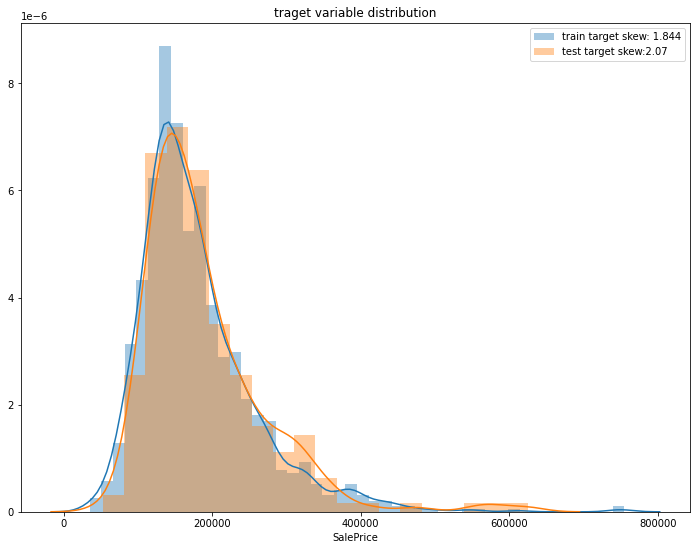

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(y_train,label=f'train target skew: {y_train.skew():.3f}')
sns.distplot(y_test,label=f'test target skew:{y_test.skew():.2f}')
plt.title('traget variable distribution')
plt.legend(loc='best')
plt.show()


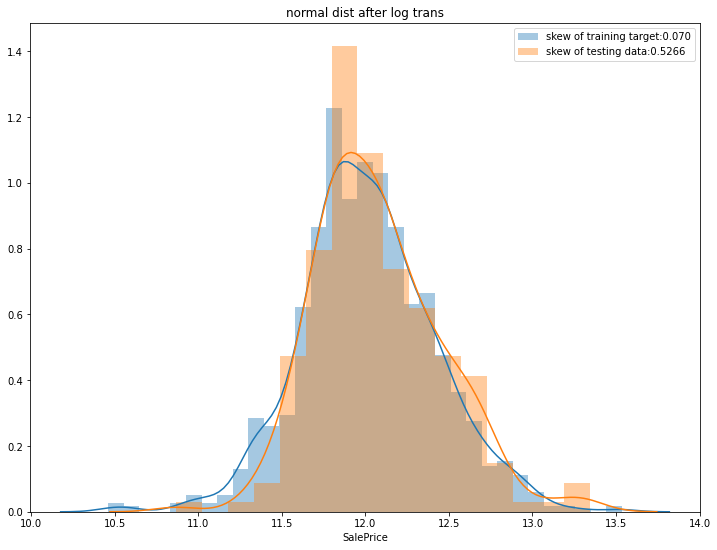

In [ ]:
'''
the previous plot shows that the data is postively skewed
fot that case we need to perform the log tranform'''
y_train=np.log(y_train)
y_test=np.log(y_test)
#let check if the this has a normal distribution
plt.figure(figsize=(12,9))
sns.distplot(y_train,label=f'skew of training target:{y_train.skew():.3f}')
sns.distplot(y_test,label=f'skew of testing data:{y_test.skew():.4f}')
plt.title('normal dist after log trans')
plt.legend(loc='best')
plt.show()

Explore the categorical features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


min() arg is an empty sequence


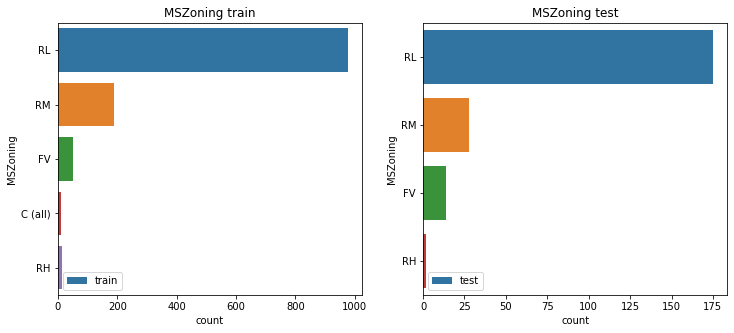

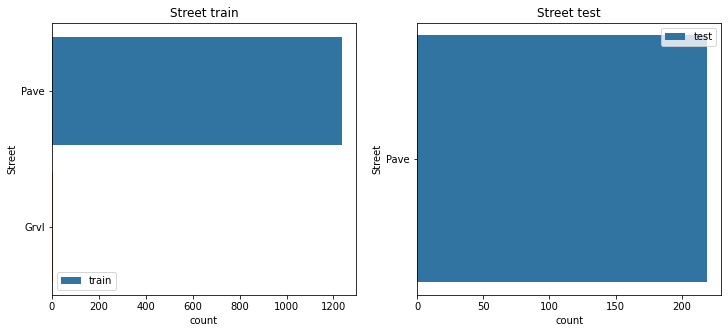

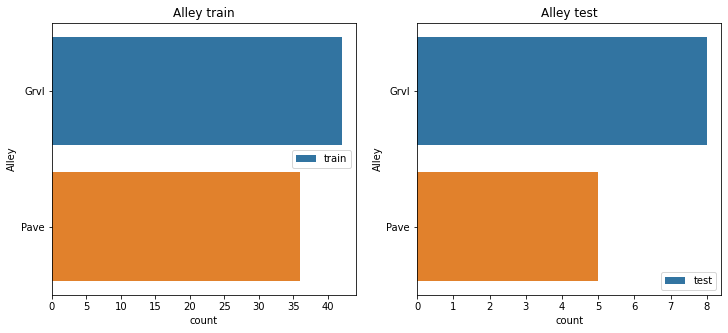

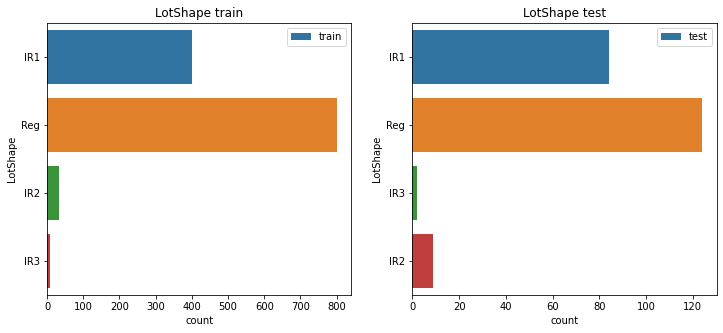

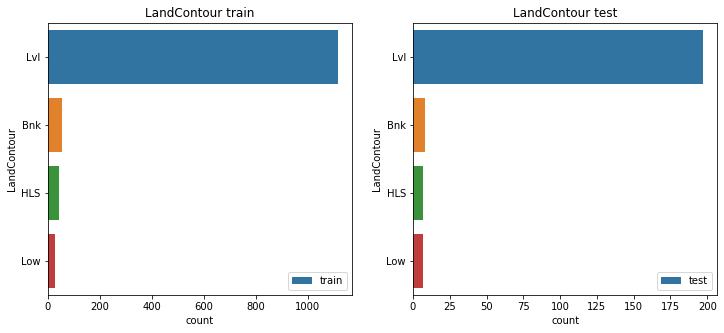

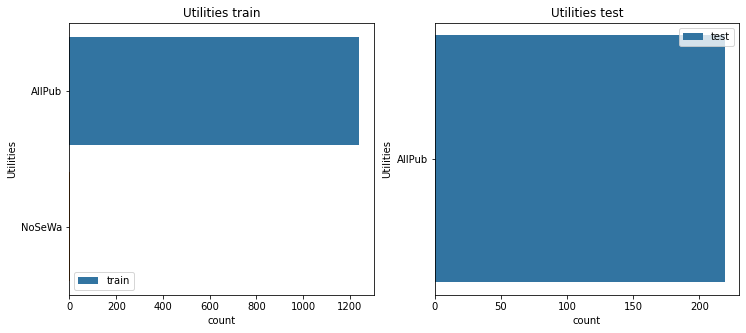

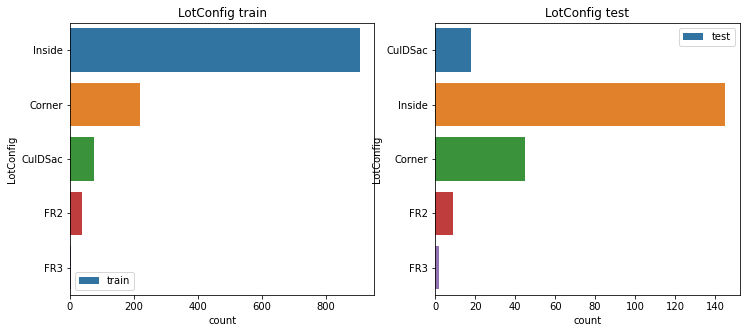

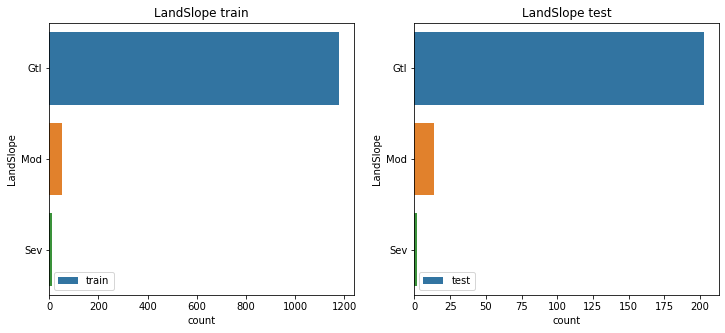

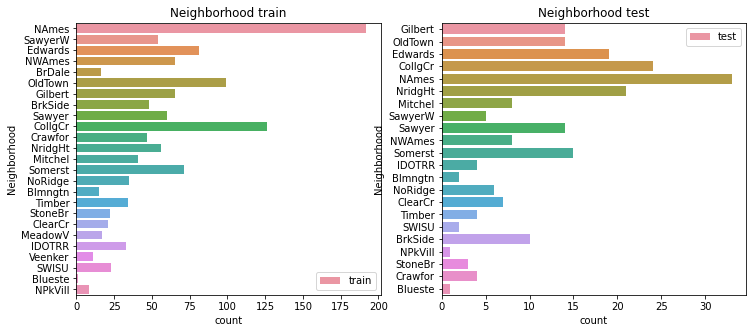

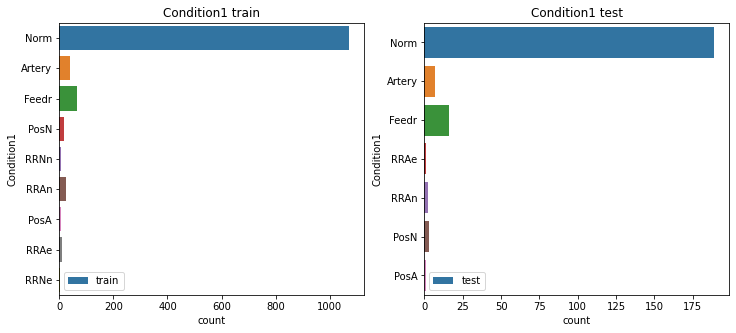

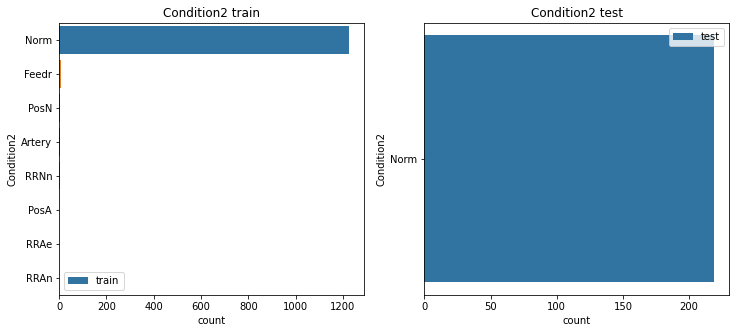

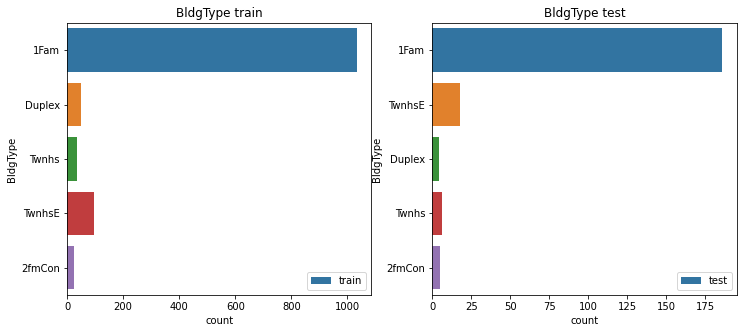

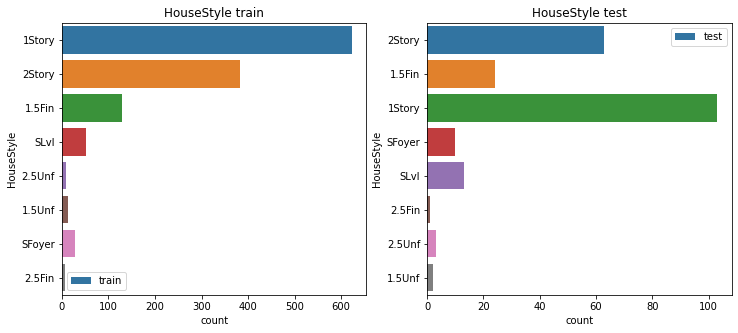

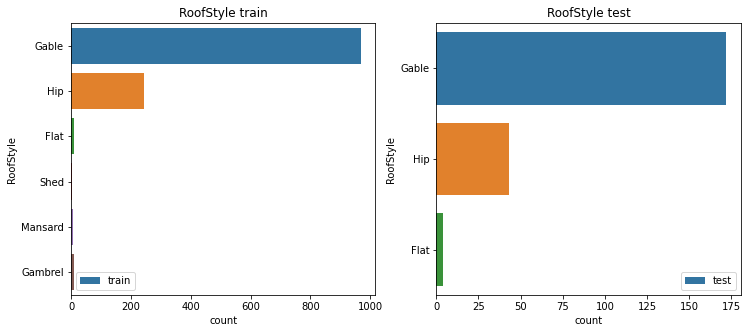

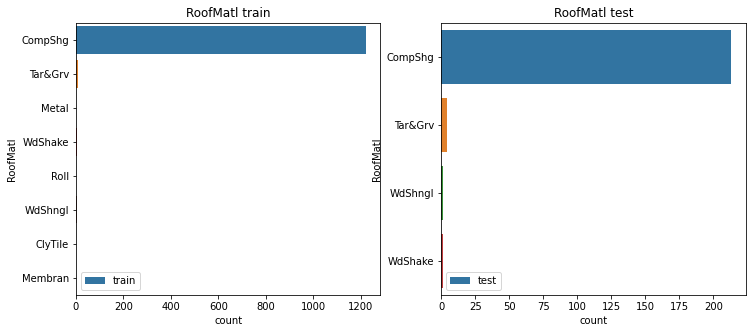

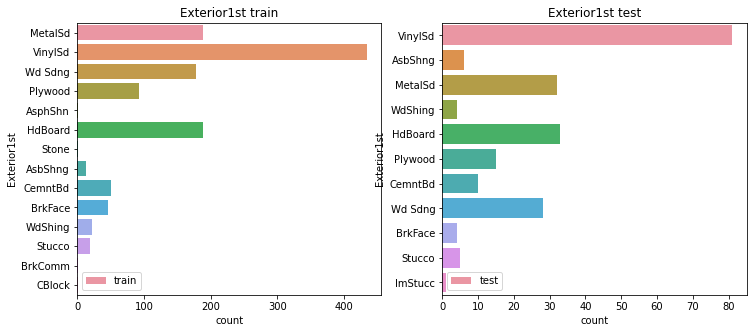

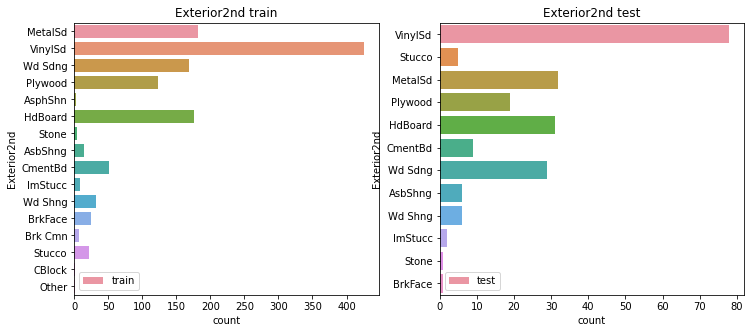

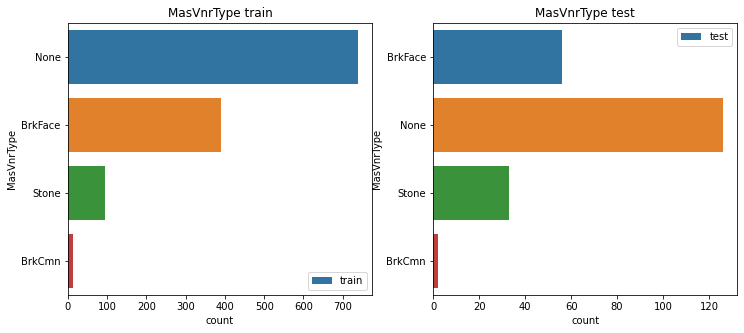

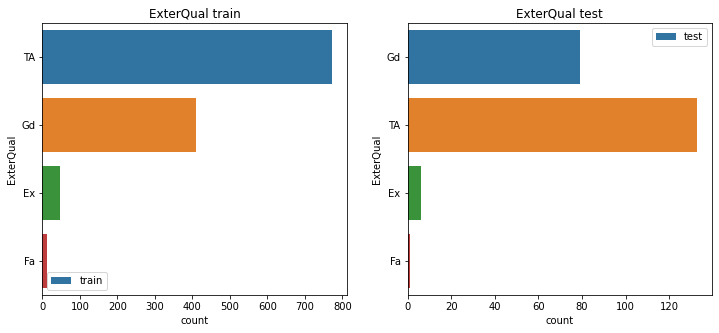

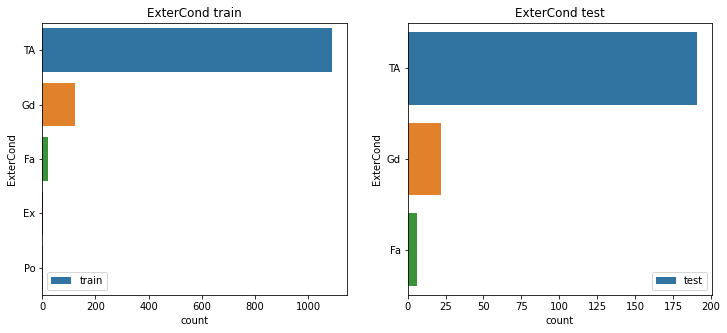

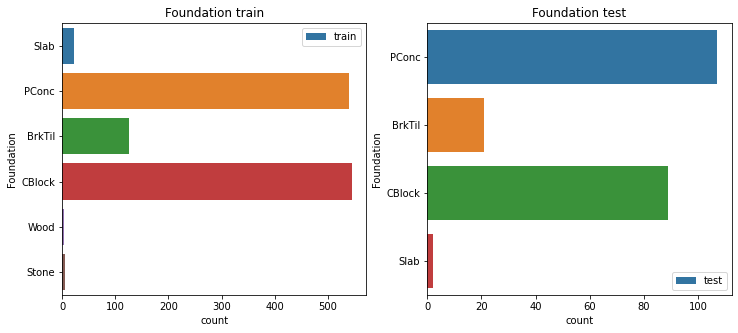

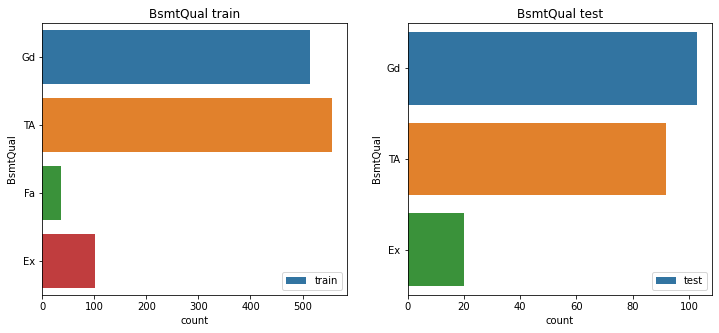

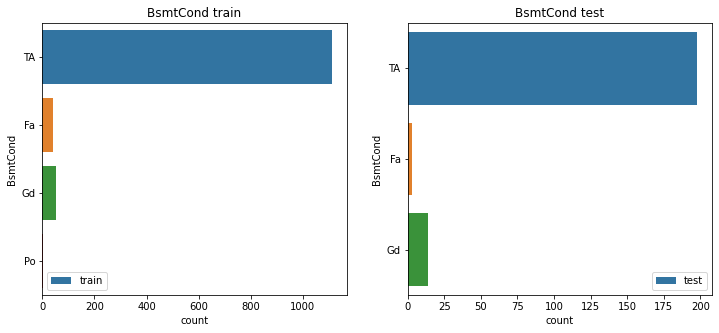

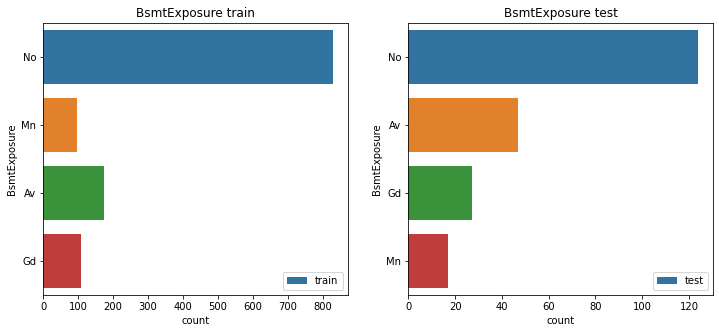

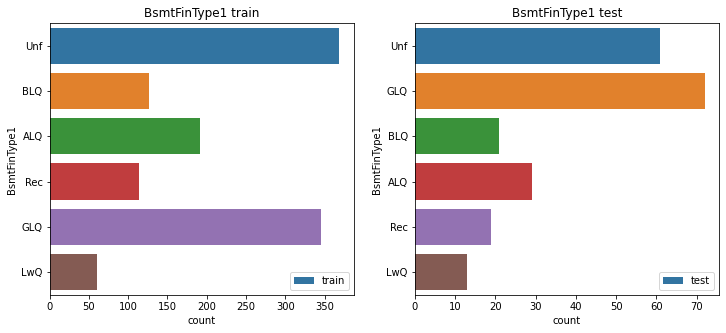

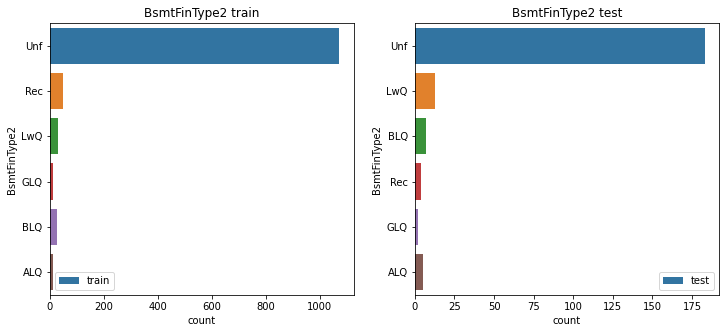

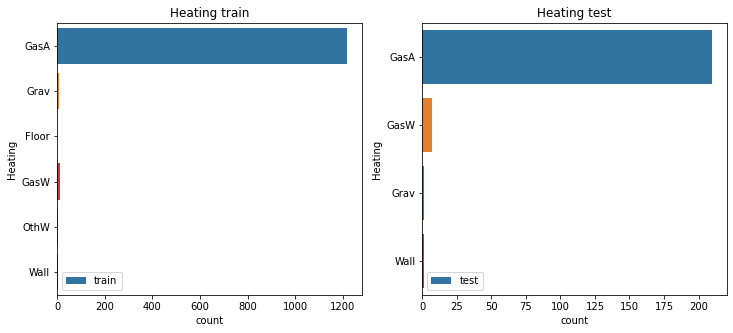

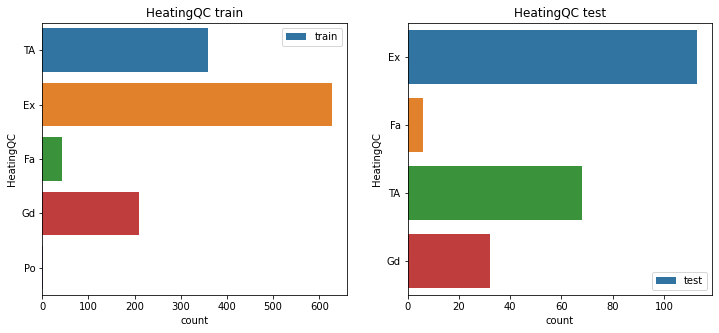

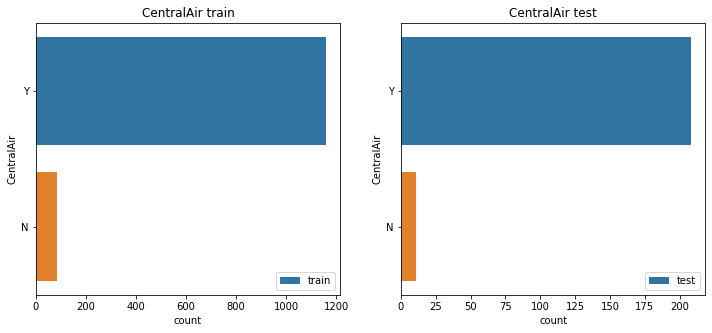

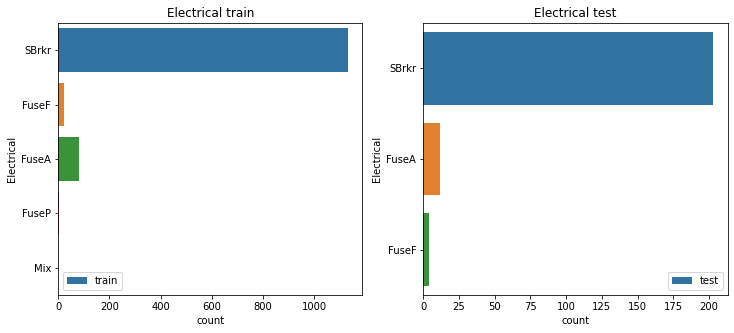

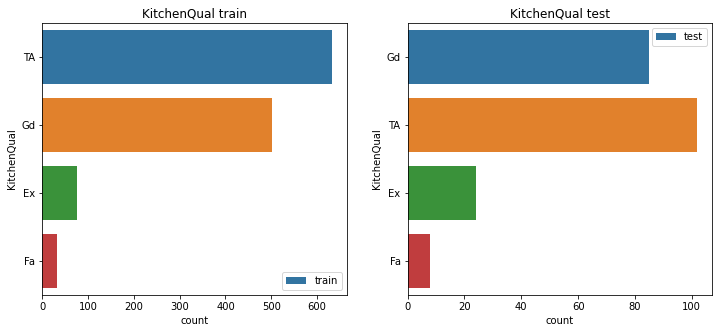

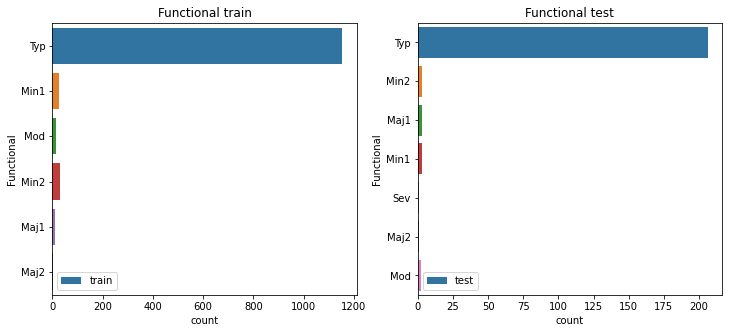

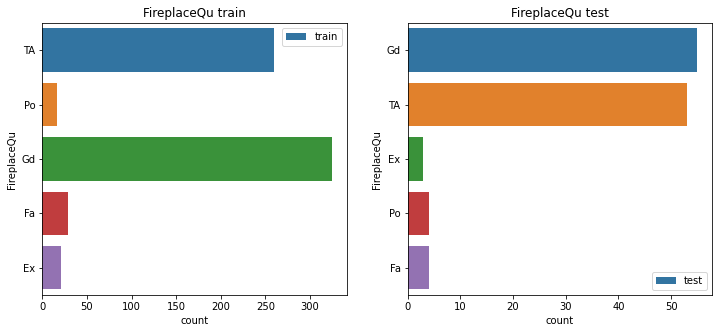

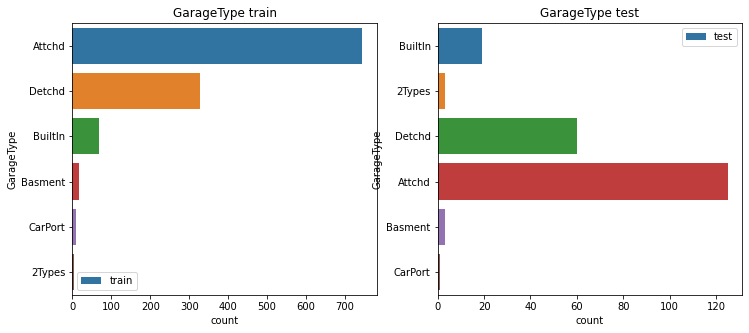

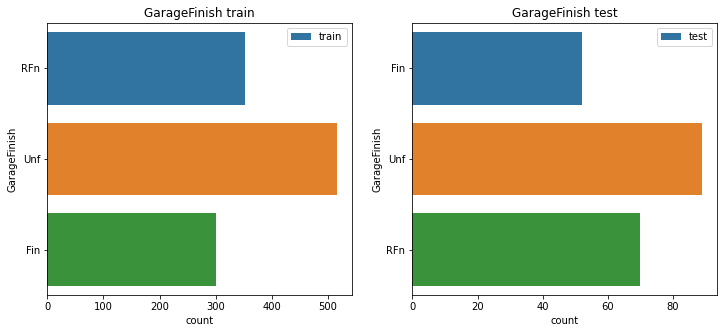

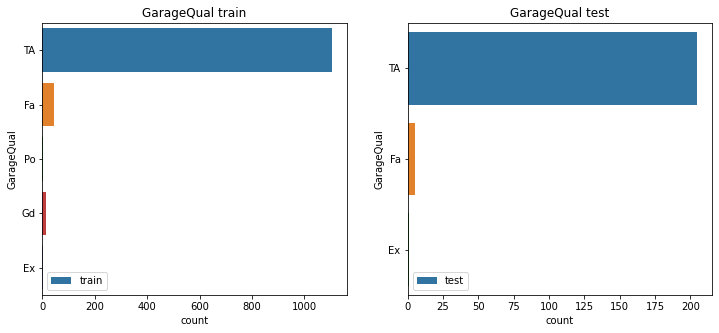

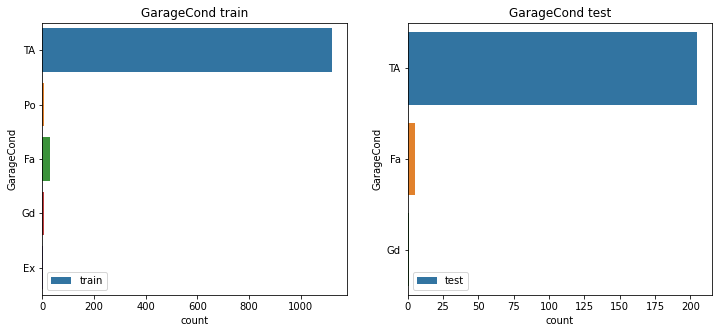

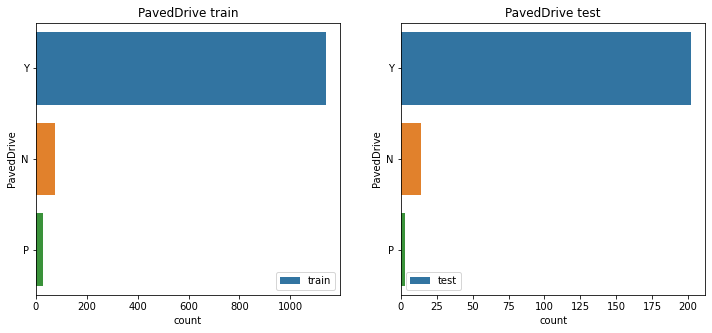

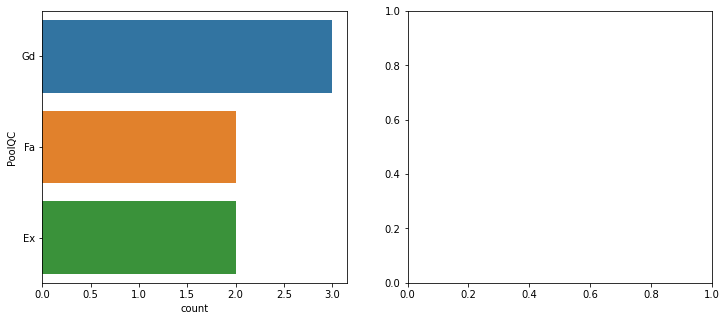

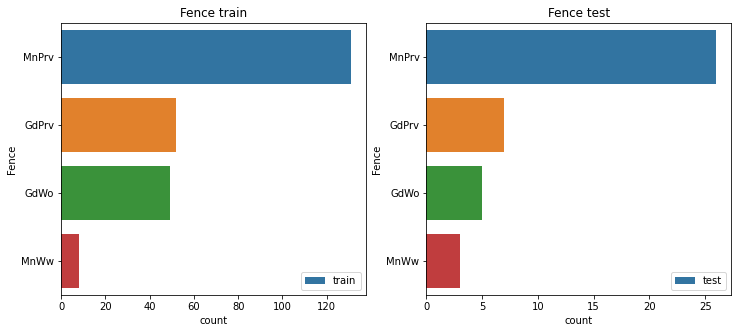

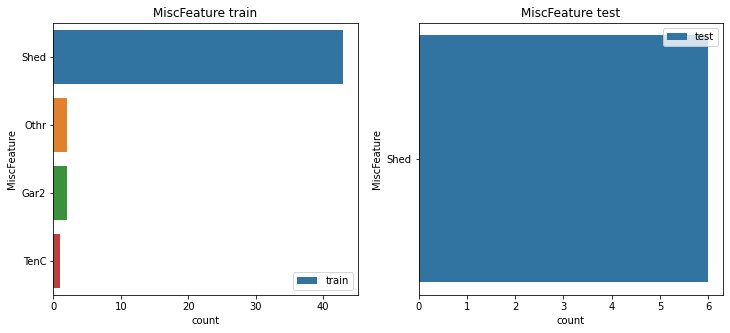

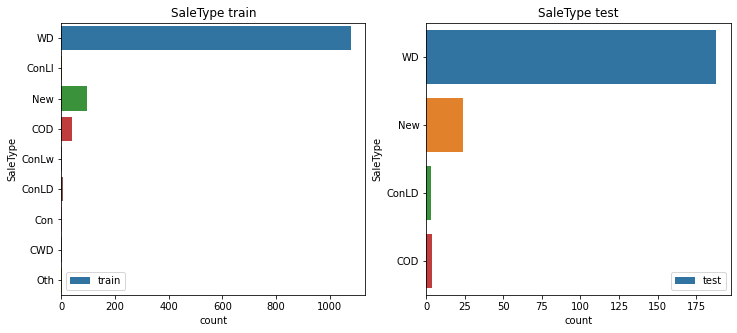

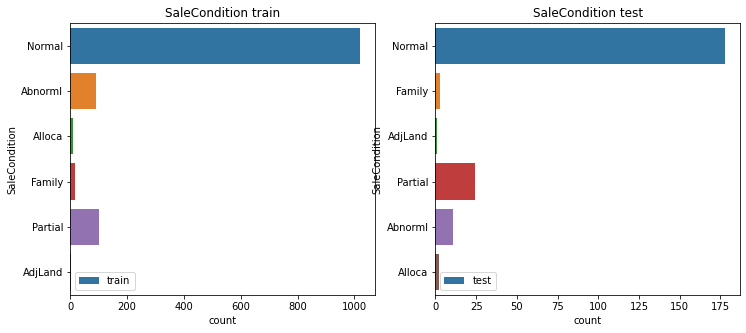

In [ ]:
cat_vars=data.select_dtypes(include=['object']).columns.tolist()
for cat in cat_vars:
  try:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.countplot(y=cat,data=X_train,label='train',ax=ax[0])
    sns.countplot(y=cat,data=X_test,label='test',ax=ax[1])
    ax[0].set_title(cat+' train')
    ax[1].set_title(cat+' test')
    ax[0].legend(loc='best')
    ax[1].legend(loc='best')
  except Exception as e:  # this is important or else exception will be treated as error and break the for loop
    print(e)

Explore Year variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


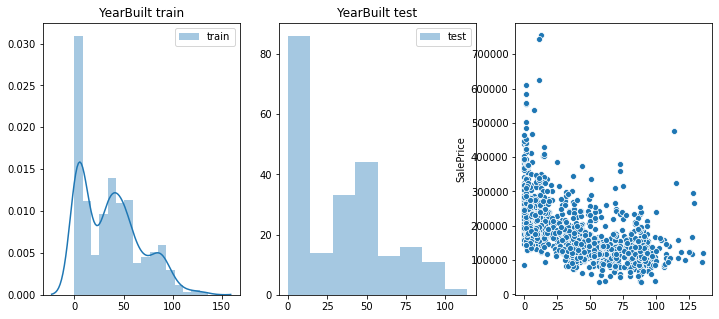

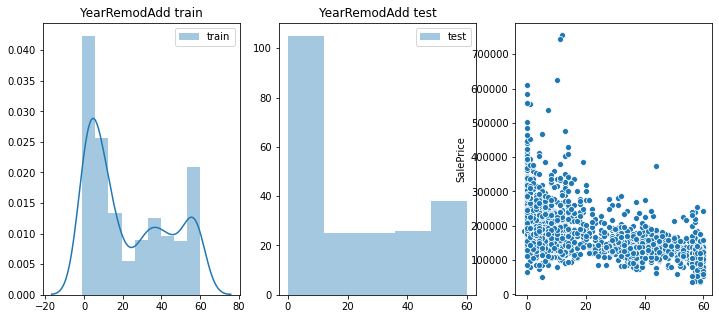

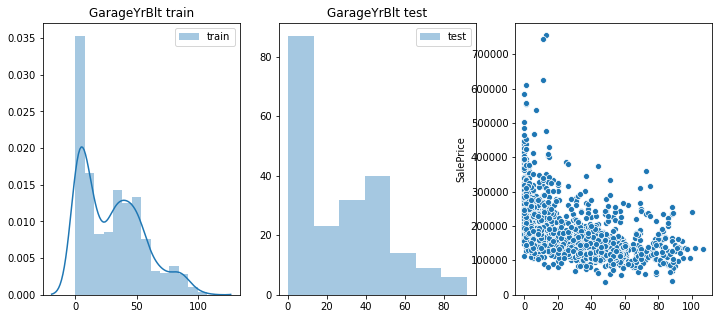

In [ ]:
year_cols=[col for col in data.columns if 'Yr' in col or 'Year' in col]
print(year_cols)
for col in year_cols:
  if col =='YrSold':
    continue
  try:
    fig,ax=plt.subplots(1,3,figsize=(12,5))
    sns.distplot((X_train['YrSold']-X_train[col]).dropna(),kde=True,label='train',ax=ax[0])
    sns.distplot(X_test['YrSold']-X_test[col],kde=False,label='test',ax=ax[1])
    sns.scatterplot(x=(data['YrSold']-data[col]),y=data['SalePrice'],data=data,ax=ax[2])  # or i must creat a new feature for yrear difference than plot this plot
    ax[0].set_title(col +' train')
    ax[1].set_title(col+' test')
    ax[0].legend(loc='best')
    ax[1].legend(loc='best')
    plt.show()
  except Exception as e:
    print(e)

explore the continous variavles that has moe then 20 unique values and not in year_cols or the target variable

In [ ]:
cont_vars=data.select_dtypes(include=['float','int']).columns.tolist()
''' select only the continous varaibles that have moret than 20 unique values
'''
print(len(data['SalePrice'].unique()))
print(data['SalePrice'].nunique())
#print(data['SalePrice'].unique())


#cont_vars=[col for col in cont_vars if len(data[col].unique())>20 and (col not in ['Id','SalePrice']+year_cols)]'
''' these 2 lines have the same outcome '''
cont_vars=[col for col in cont_vars if (data[col].nunique()>20) and (col not in ['Id','SalePrice']+year_cols)]
''''

for cont in cont_vars:
  try:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(X_train[cont],label='trian',ax=ax[0])
    sns.distplot(X_test[cont],label='test',ax=ax[1])
    ax[0].set_title(cont +" train")
    ax[1].set_title(cont +" test")
    ax[0].legend(loc='best')
    ax[1].legend(loc='best')
    plt.show()
  except Exception as e:
    print(e)
'''

663
663


'\'\n\nfor cont in cont_vars:\n  try:\n    fig,ax=plt.subplots(1,2,figsize=(12,5))\n    sns.distplot(X_train[cont],label=\'trian\',ax=ax[0])\n    sns.distplot(X_test[cont],label=\'test\',ax=ax[1])\n    ax[0].set_title(cont +" train")\n    ax[1].set_title(cont +" test")\n    ax[0].legend(loc=\'best\')\n    ax[1].legend(loc=\'best\')\n    plt.show()\n  except Exception as e:\n    print(e)\n'

explore the continous variable that has less then 20 unique variables
they mus tbe treated as categoriacal

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']


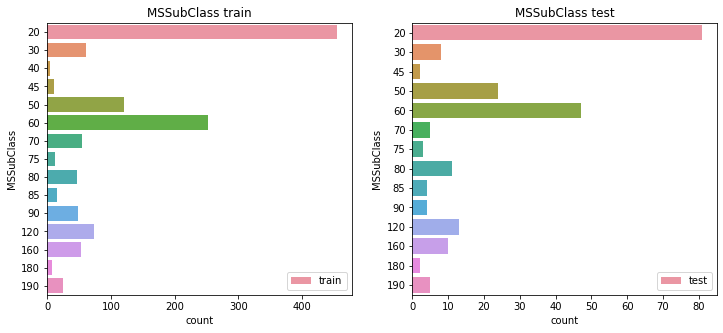

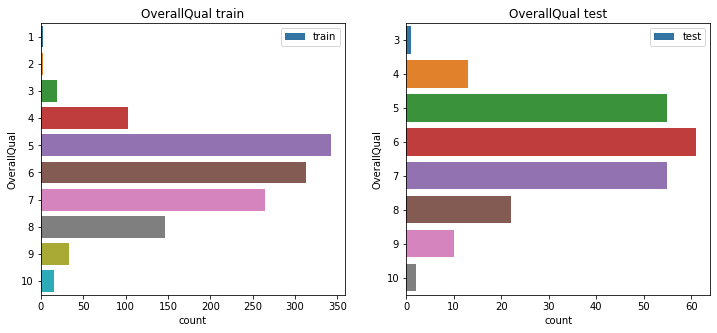

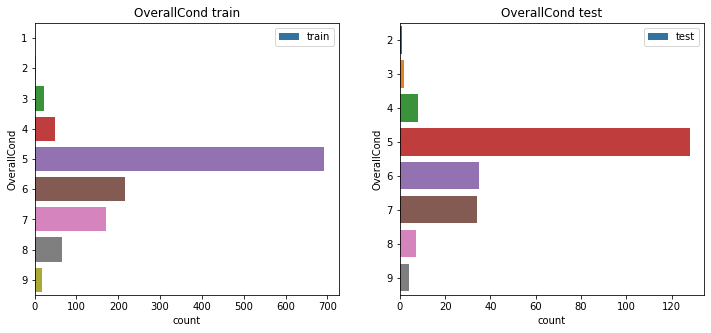

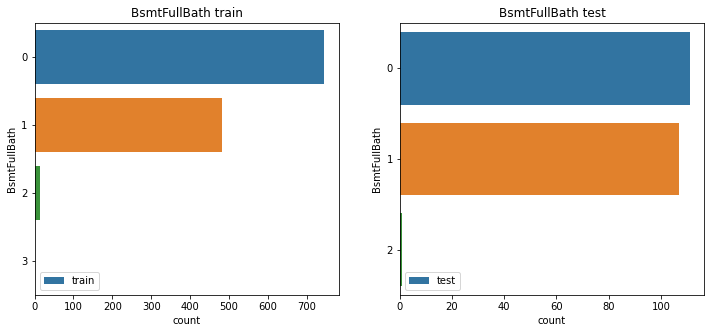

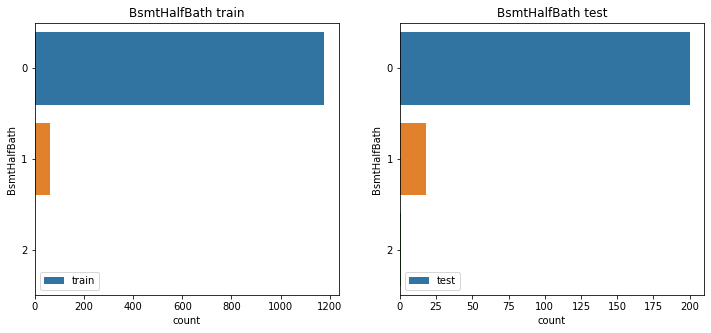

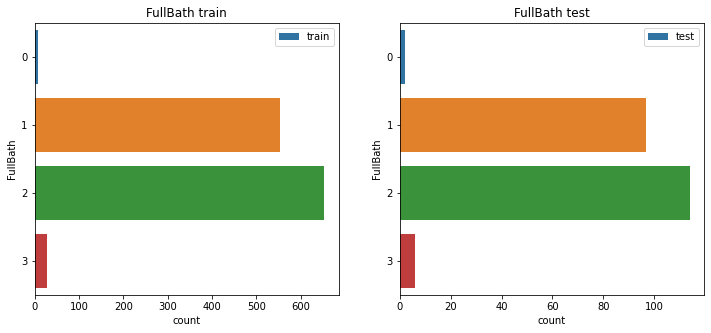

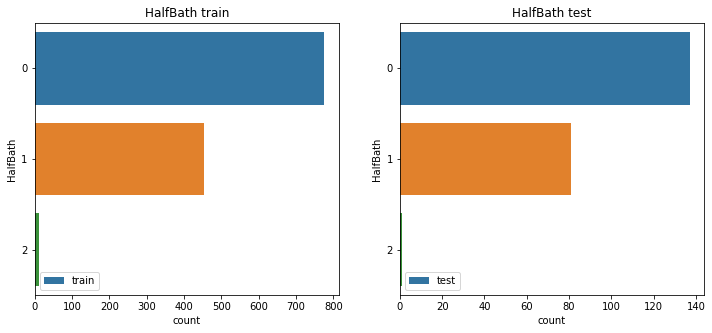

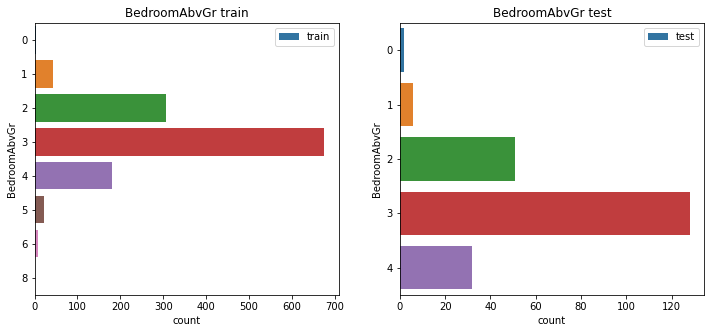

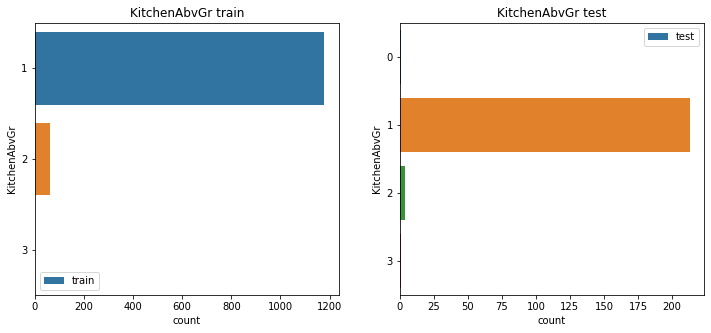

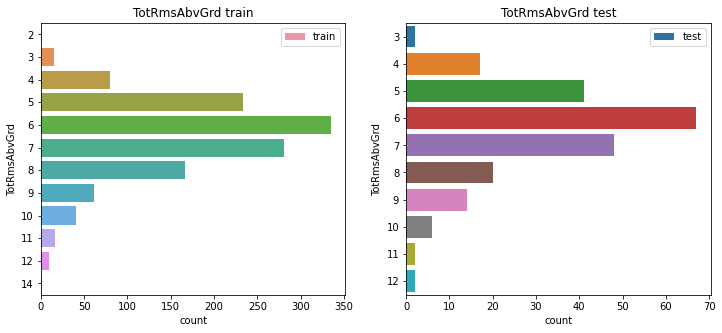

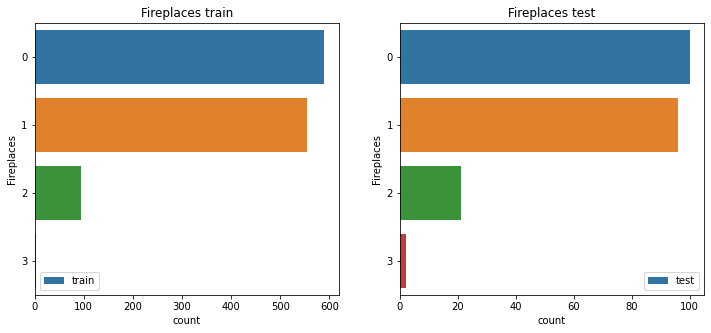

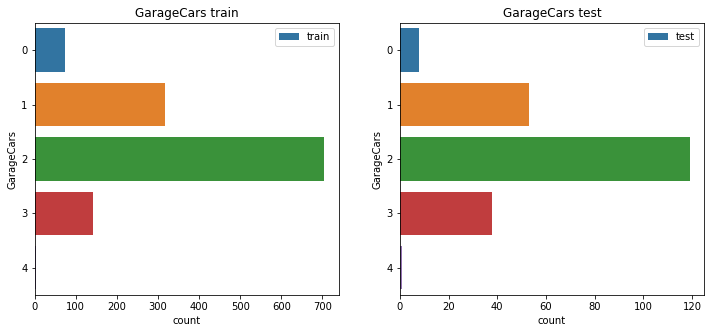

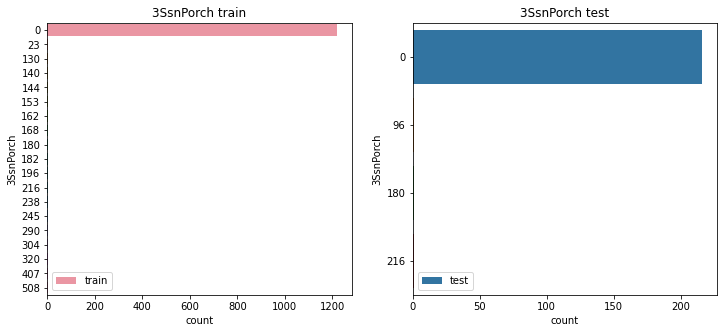

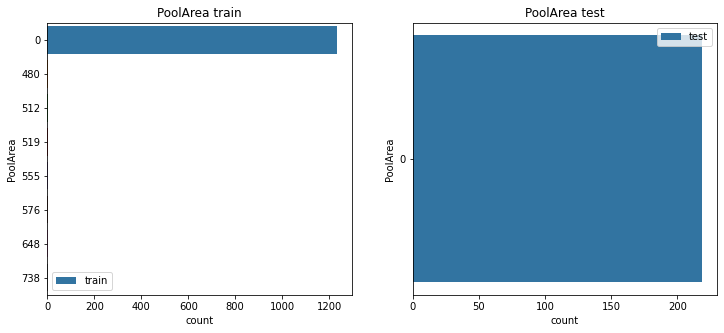

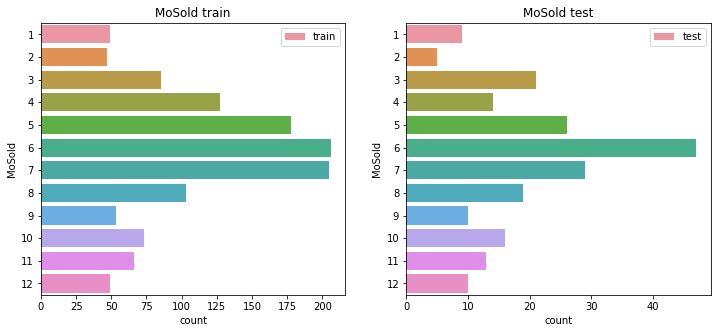

In [ ]:
cat_int_vars=data.select_dtypes(include=['float','int']).columns.tolist()
# slect only the one that have less then 20 unqieu values

cat_int_vars=[col for col in cat_int_vars if (data[col].nunique()<=20) and (col not in ['Id','SalePrice']+year_cols)]
print(cat_int_vars)

for cat in cat_int_vars:
  try:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.countplot(y=cat,data=X_train,label='train',ax=ax[0])
    sns.countplot(y=cat,data=X_test,label="test",ax=ax[1])
    ax[0].set_title(f'{cat} train')
    ax[1].set_title(f'{cat} test')
    ax[0].legend(loc='best')
    ax[1].legend(loc='best')
    plt.show()
  except Exception as e:
    print(e)

**Dealing with missing value:**

First creat function that returns the number and % of missing values in each feature

In [ ]:
def num_missing(df):
  nulls=df.isnull() # return df with true if the value is null and false if not
  counts=nulls.sum() # count the values of null in each feature becasue True=1 and Fasle=0
  per=nulls.mean().mul(100.) # beacuse in null df each missing value is 1 and other values are 0,
                             # so the .mean() methode return the % of missing values
  null_df=pd.DataFrame({'Count of missing value': counts,"% of missing value":per},index=counts.index)  # index argument could be ignored

 # return(print(null_df))
  display(null_df)  #display is graphicaly better then print


In [ ]:
vars_with_na=[col for col in X_train.columns if X_train[col].isnull().sum()>0] 
# if perform on X_train to reflected a real senario

num_missing(X_train[vars_with_na])
print('for test data')
num_missing(X_test[vars_with_na])


,Count of missing value,% of missing value
LotFrontage,207,16.680097
Alley,1163,93.714746
MasVnrType,6,0.483481
MasVnrArea,6,0.483481
BsmtQual,33,2.659146
BsmtCond,33,2.659146
BsmtExposure,34,2.739726
BsmtFinType1,33,2.659146
BsmtFinType2,33,2.659146
Electrical,1,0.080580


for test data


,Count of missing value,% of missing value
LotFrontage,52,23.744292
Alley,206,94.063927
MasVnrType,2,0.913242
MasVnrArea,2,0.913242
BsmtQual,4,1.826484
BsmtCond,4,1.826484
BsmtExposure,4,1.826484
BsmtFinType1,4,1.826484
BsmtFinType2,5,2.283105
Electrical,0,0.000000


Let's drop columns where the percentage of missingness is vey high

In [ ]:
to_drop = []

for var in vars_with_na:
  try:
    if X_train[var].isnull().mean() > 0.9:
        to_drop.append(var)
  except Exception as e:
    print(f'excpetionis {e} ')
print(to_drop)

X_train.drop(columns=to_drop,inplace=True)
X_test.drop(columns=to_drop,inplace=True)

vars_with_na=[col for col in vars_with_na if col not in to_drop]
num_missing(X_train[vars_with_na])
num_missing(X_test[vars_with_na])
'''
drop the features with high missing values
and update the list 
'''
cat_vars=[col for col in cat_vars + cat_int_vars if col not in to_drop]
num_vars=[col for col in cont_vars + year_cols if col not in to_drop]


['Alley', 'PoolQC', 'MiscFeature']


,Count of missing value,% of missing value
LotFrontage,207,16.680097
MasVnrType,6,0.483481
MasVnrArea,6,0.483481
BsmtQual,33,2.659146
BsmtCond,33,2.659146
BsmtExposure,34,2.739726
BsmtFinType1,33,2.659146
BsmtFinType2,33,2.659146
Electrical,1,0.080580
FireplaceQu,590,47.542305


,Count of missing value,% of missing value
LotFrontage,52,23.744292
MasVnrType,2,0.913242
MasVnrArea,2,0.913242
BsmtQual,4,1.826484
BsmtCond,4,1.826484
BsmtExposure,4,1.826484
BsmtFinType1,4,1.826484
BsmtFinType2,5,2.283105
Electrical,0,0.000000
FireplaceQu,100,45.662100


Deal with missing value in categorical columns

In [ ]:
#cat_vars_with_na=[col for col in vars_with_na if col in cat_vars]
''' 
I can perofrm the followinf function on all cat_vars
eaven if they dont have missing values
'''
def fill_cat_na(X,var_list):# feed the function with the df and the list with the name of categorical features
  for var in var_list:
    if X[var].dtypes=='object': # handle object type
     X[var].fillna('Missing',inplace=True)
    else:                 #handle categorical int
     X[var].fillna(-9999,inplace=True)
  return(X)
X_train=fill_cat_na(X_train,cat_vars)
print(X_train[cat_vars].isnull().sum())
print(X_test[cat_vars].isnull().sum().sum())
X_test=fill_cat_na(X_test,cat_vars)
assert X_test[cat_vars].isnull().sum().sum()==0

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
3SsnPorch   

deal with missing value in continous features

In [ ]:
print(X_train['LotFrontage'].iloc[0:20])
print(X_train['LotFrontage'].mode()[0])


392       NaN
252      65.0
155      60.0
1336     87.0
1011     75.0
1029     21.0
630      50.0
310       NaN
935      52.0
1199     75.0
894      64.0
154      84.0
203       NaN
1351     70.0
1249     60.0
1101     61.0
84        NaN
1152     90.0
1014     60.0
86      122.0
Name: LotFrontage, dtype: float64
60.0


In [ ]:
def fill_cont_na(X_train,X_test,var_list): # we use the mode from training for not cheating
  for var in var_list:
   mode_var= X_train[var].mode()[0] #X_trian[var] is a pandas series
   X_train[var].fillna(mode_var,inplace=True)
   X_test[var].fillna(mode_var,inplace=True)
  return(X_train,X_test) 
print(X_train[cont_vars].isnull().sum().sum())
print(X_test[cont_vars].isnull().sum().sum())
(X_train,X_test)=fill_cont_na(X_train,X_test,num_vars) # we chose num_vars to include the years feature shuch as year built ..
assert X_train[cont_vars].isnull().sum().sum()==0
assert X_test[cont_vars].isnull().sum().sum()==0
print(X_train[cont_vars].mode().iloc[:,:])

213
54
   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         60.0     7200         0.0           0           0          0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0            0       864         0             0        864           0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  
0           0            0              0            0        0  


In [ ]:
print(X_train['LotFrontage'].iloc[0:20])


392      60.0
252      65.0
155      60.0
1336     87.0
1011     75.0
1029     21.0
630      50.0
310      60.0
935      52.0
1199     75.0
894      64.0
154      84.0
203      60.0
1351     70.0
1249     60.0
1101     61.0
84       60.0
1152     90.0
1014     60.0
86      122.0
Name: LotFrontage, dtype: float64


Make sure that all null value are replaced

In [ ]:
assert X_train.isnull().sum().sum()==0
assert X_test.isnull().sum().sum()==0


Effect of year on sale price eda

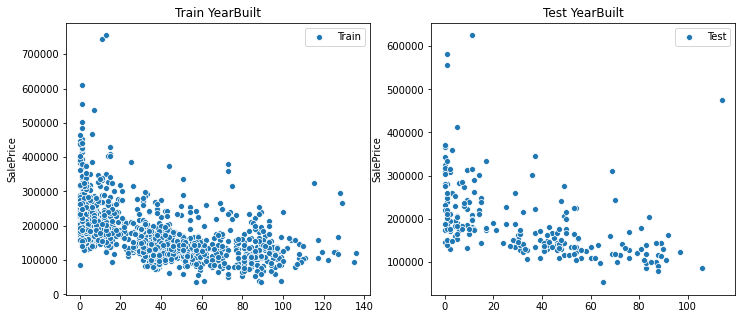

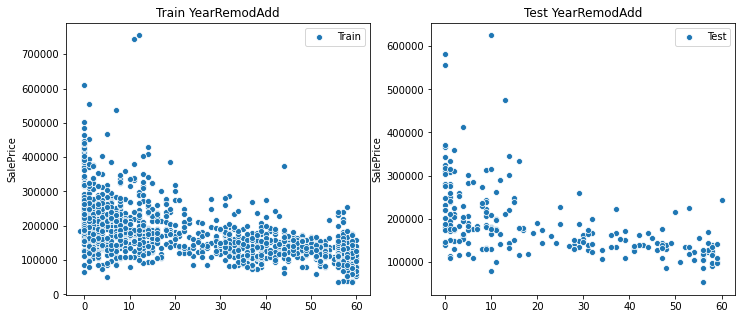

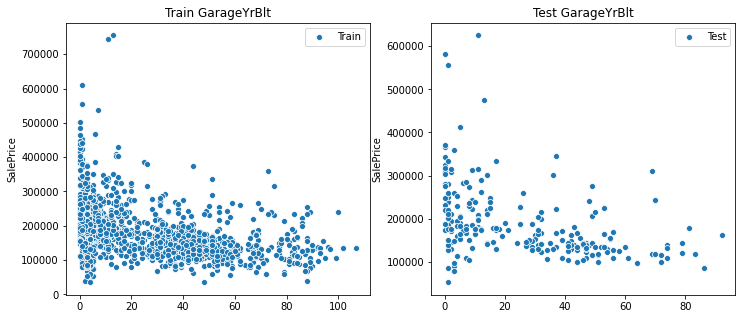

In [ ]:
for col in year_cols:
    if col=='YrSold':
     continue
    try:
     fig,ax=plt.subplots(1,2,figsize=(12,5))
     sns.scatterplot(x=(X_train['YrSold']-X_train[col]),y=np.exp(y_train),label='Train',ax=ax[0])
     sns.scatterplot(x=(X_test['YrSold']-X_test[col]),y=np.exp(y_test),label='Test',ax=ax[1])
     ax[0].set_title(f'Train {col}')
     ax[1].set_title(f'Test {col}')
     ax[0].legend(loc='best')
     ax[1].legend(loc='best')
     plt.show()
    except Exception as e:
      print

Influenc of categorical features on sale price

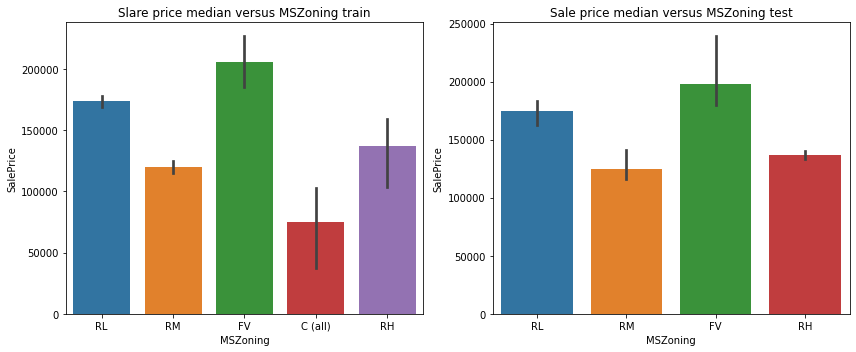

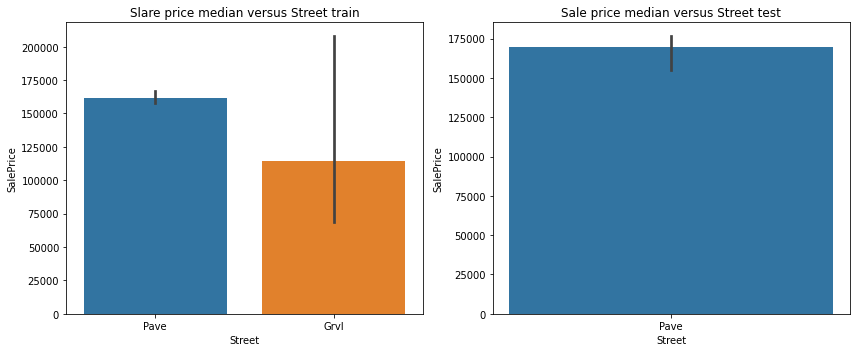

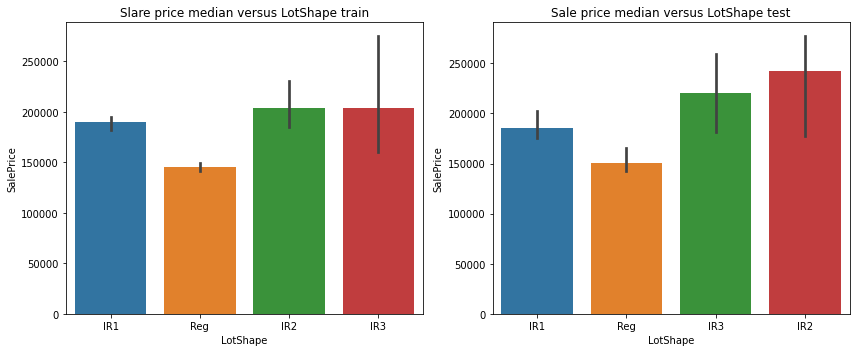

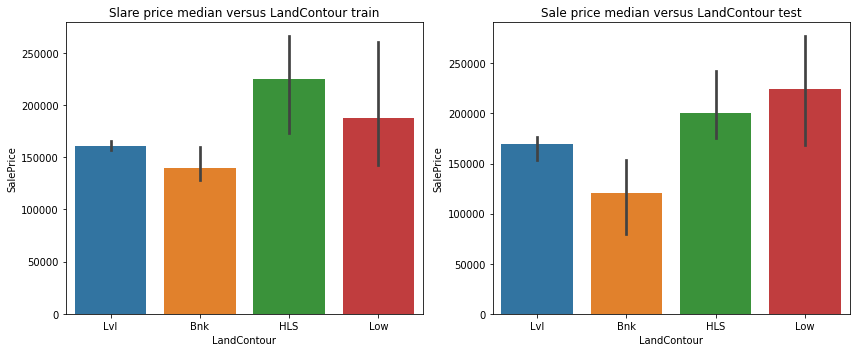

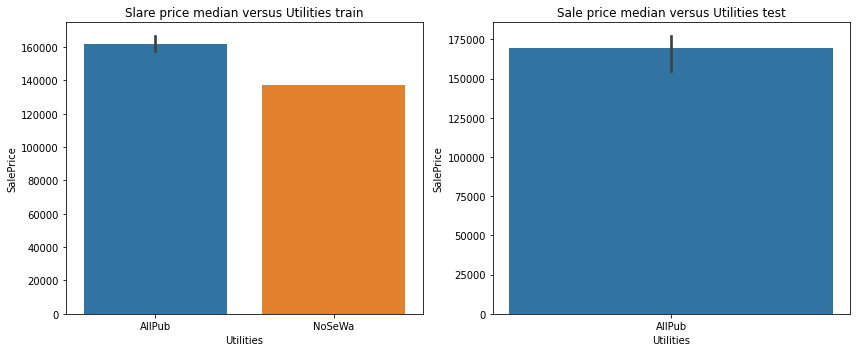

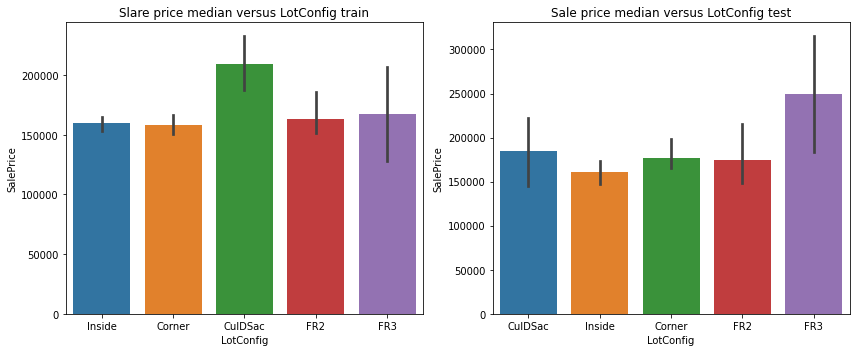

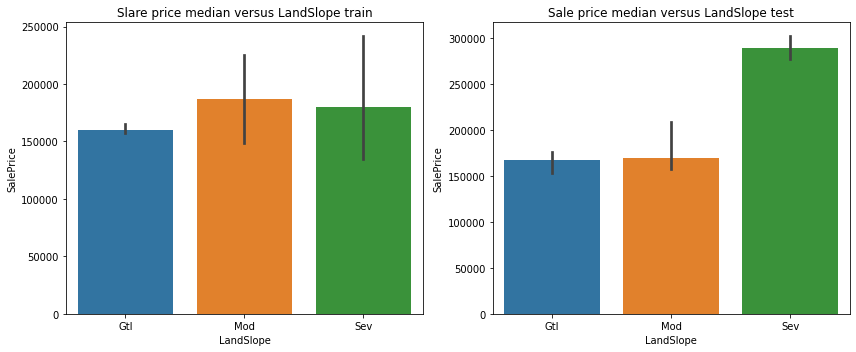

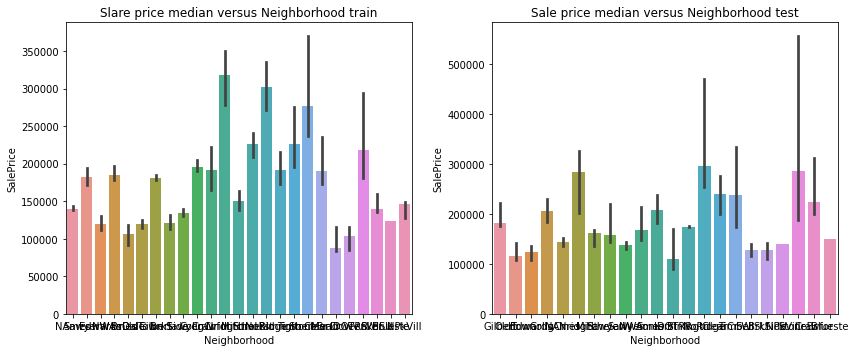

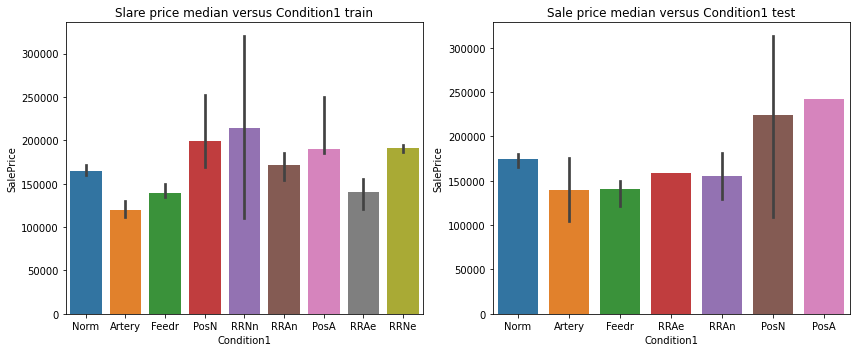

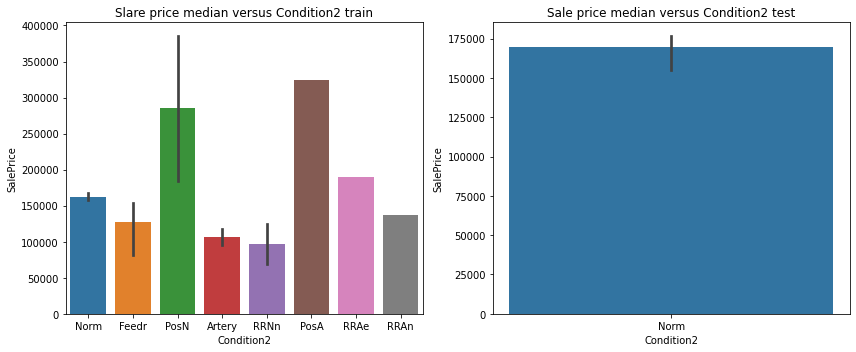

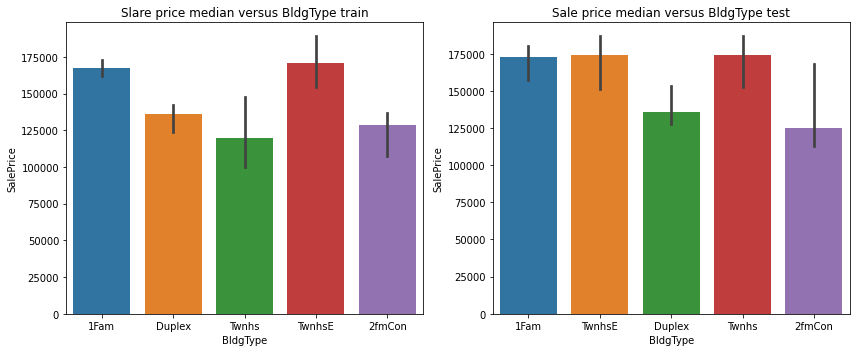

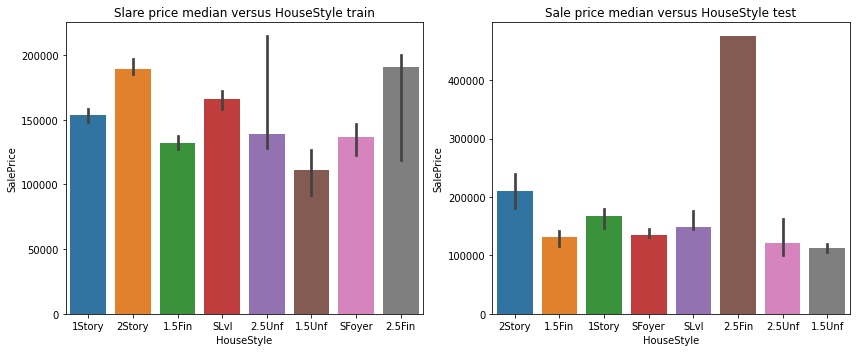

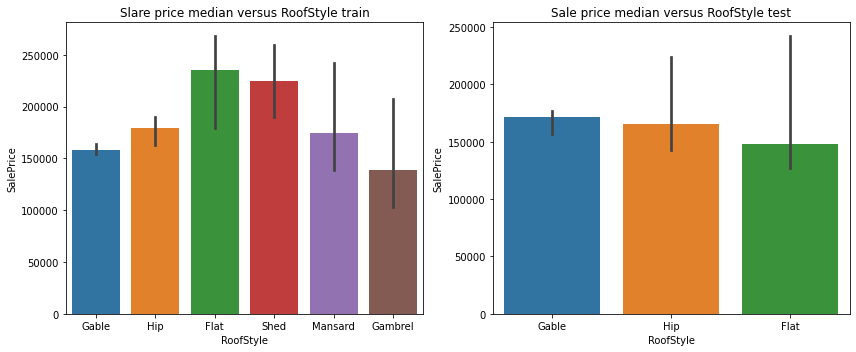

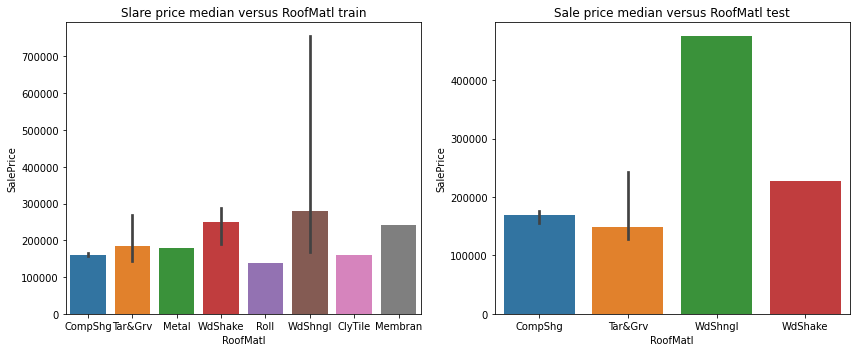

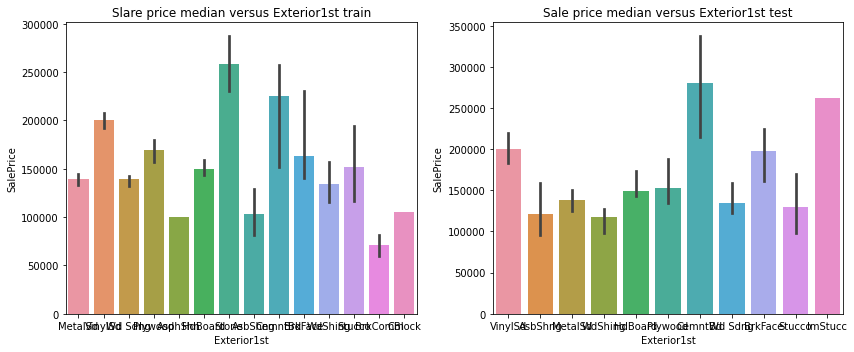

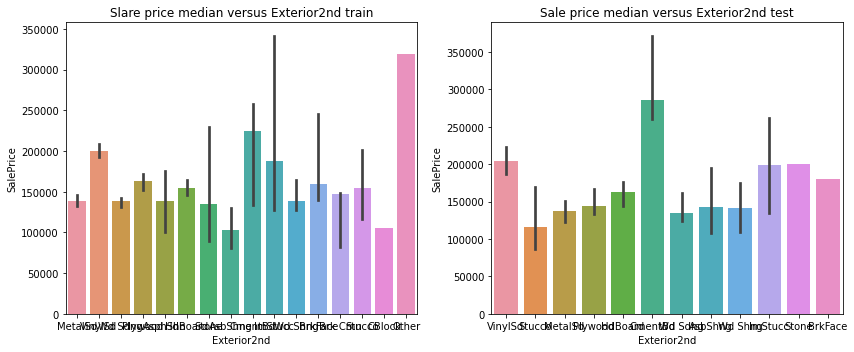

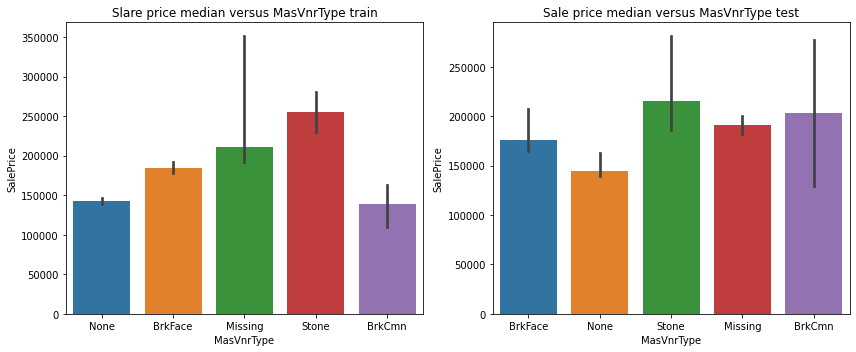

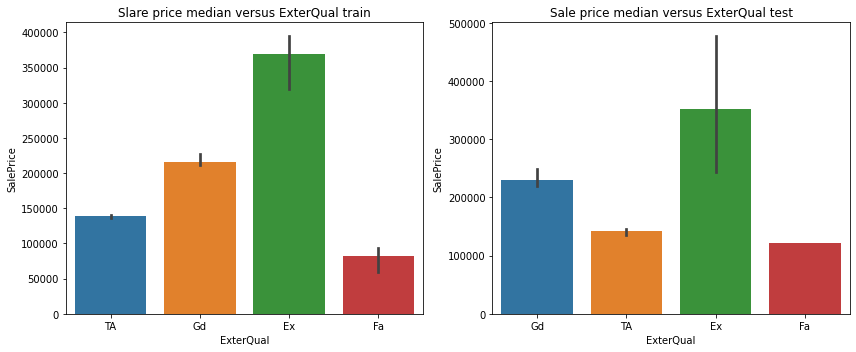

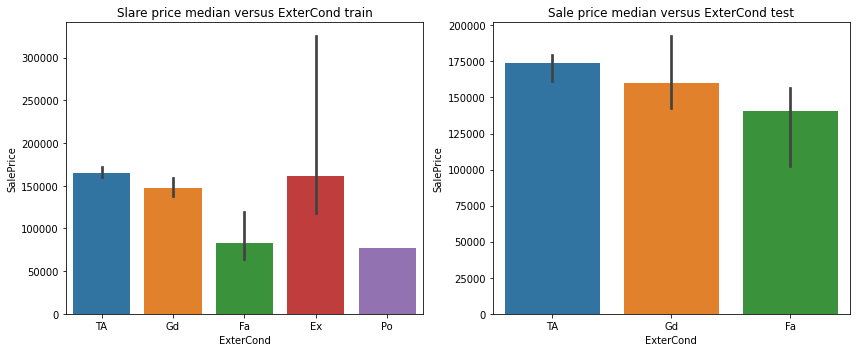

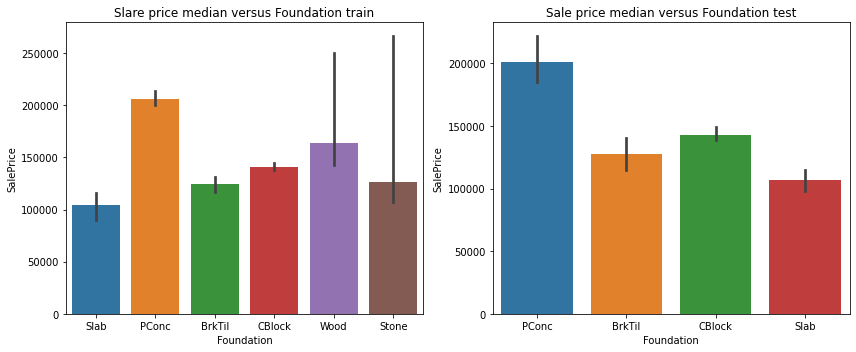

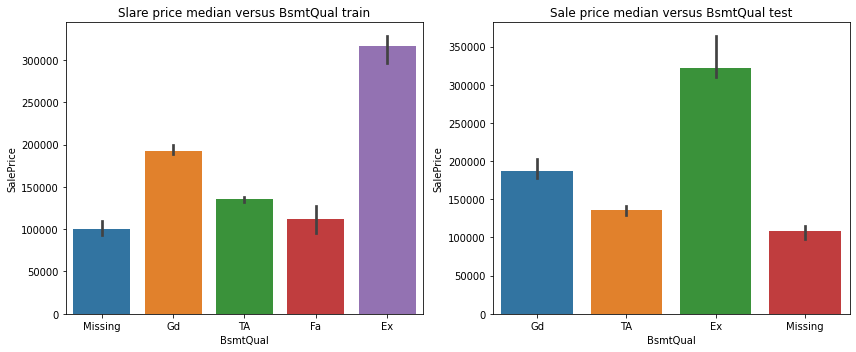

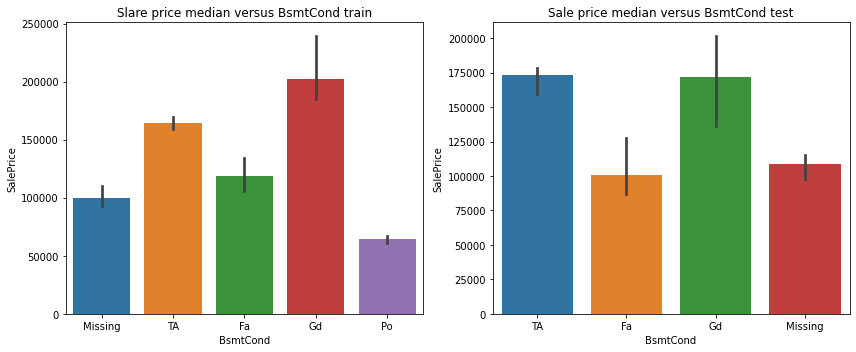

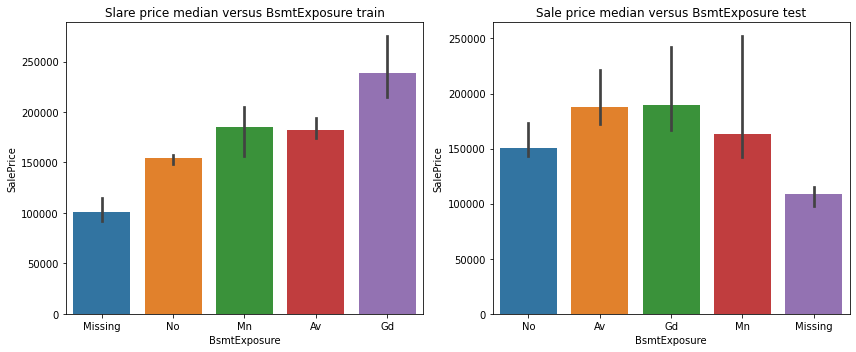

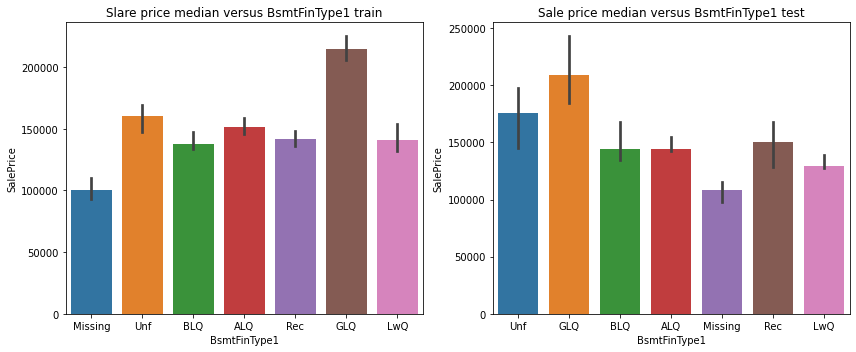

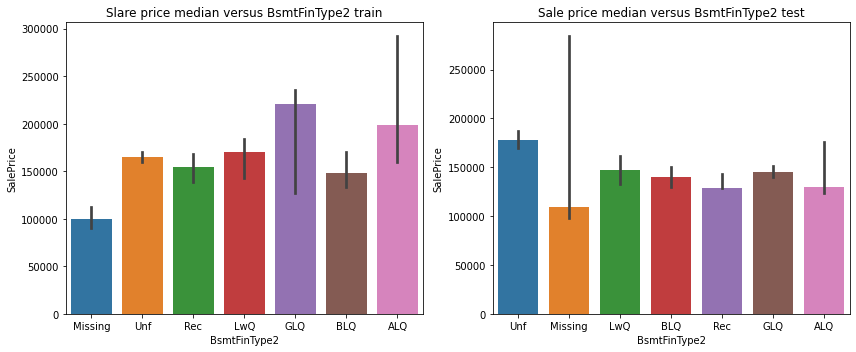

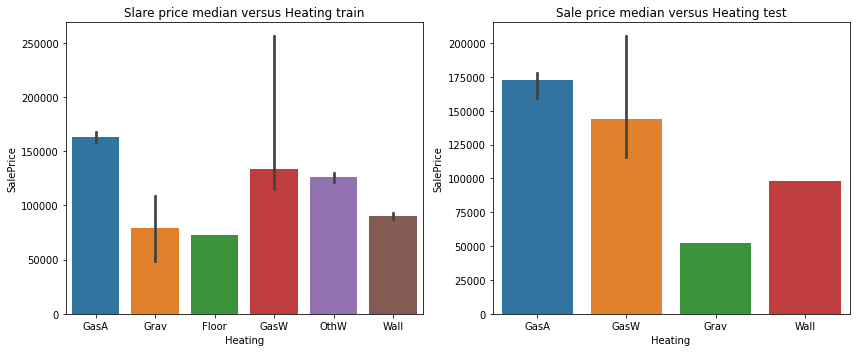

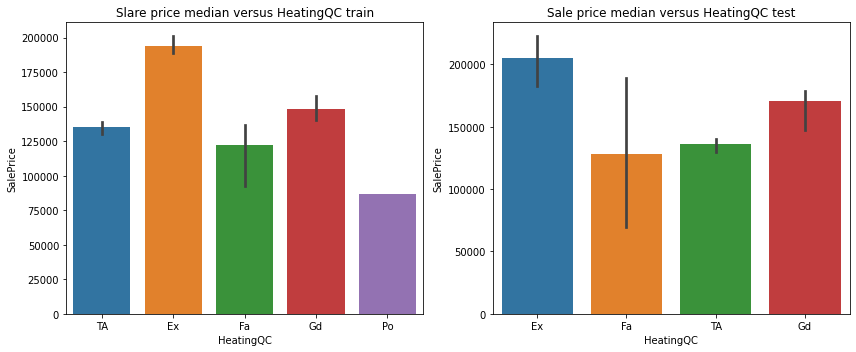

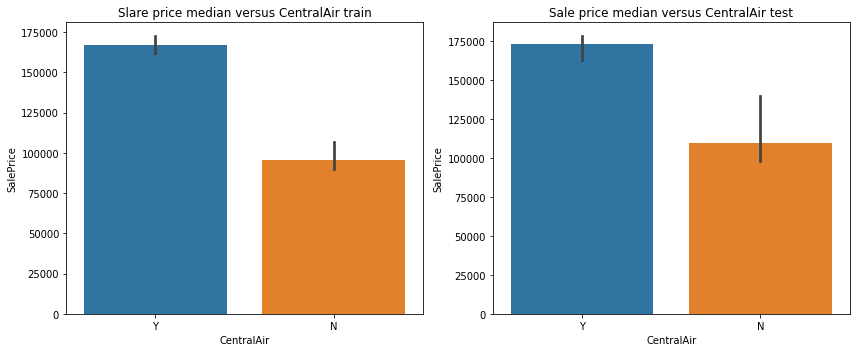

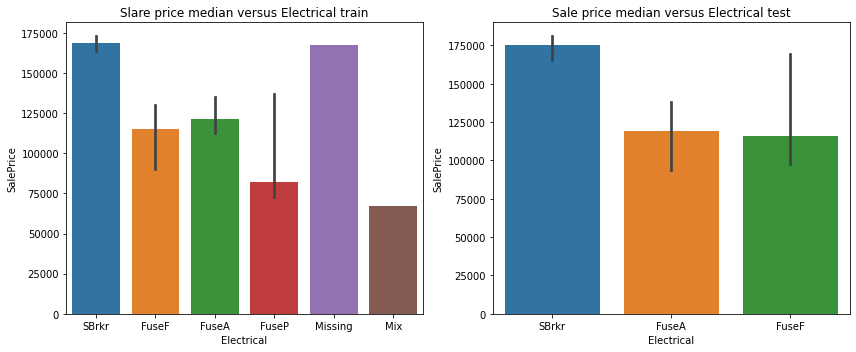

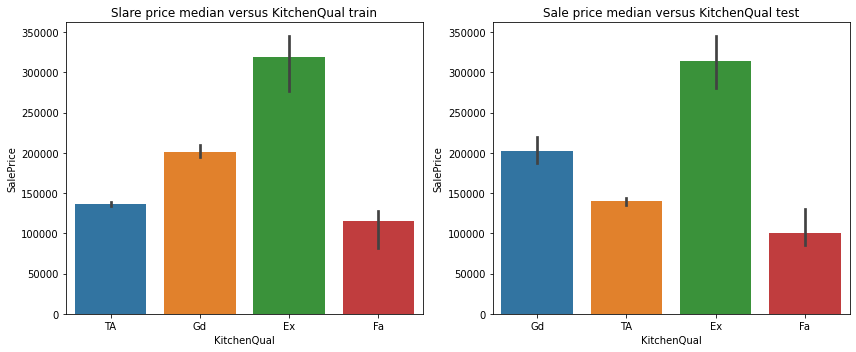

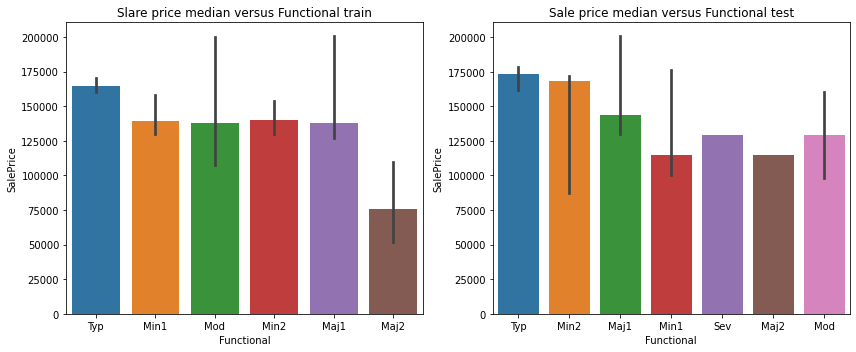

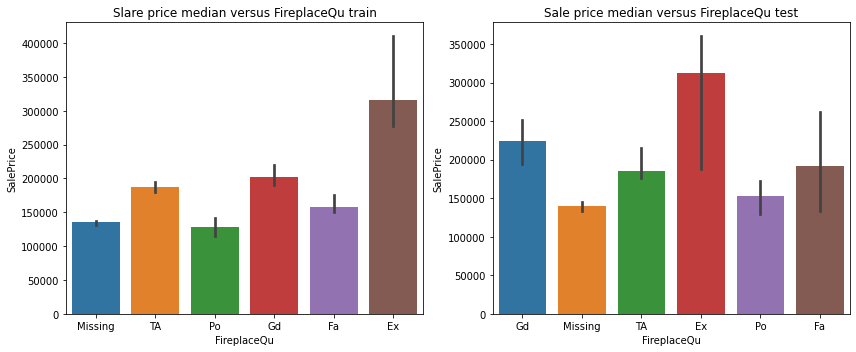

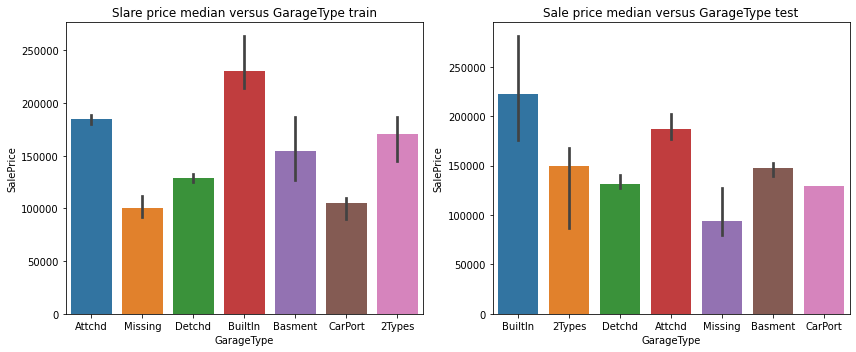

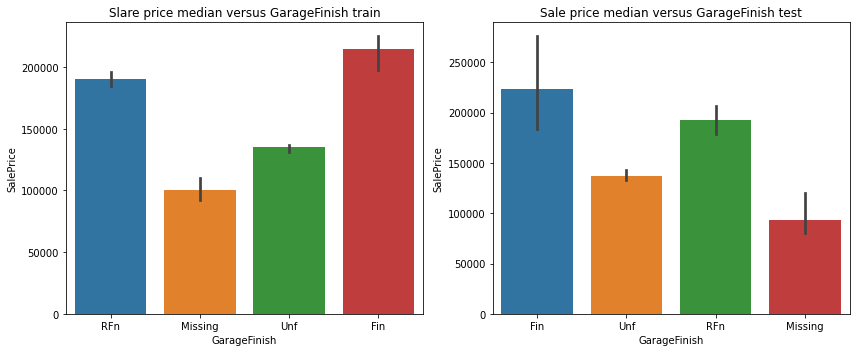

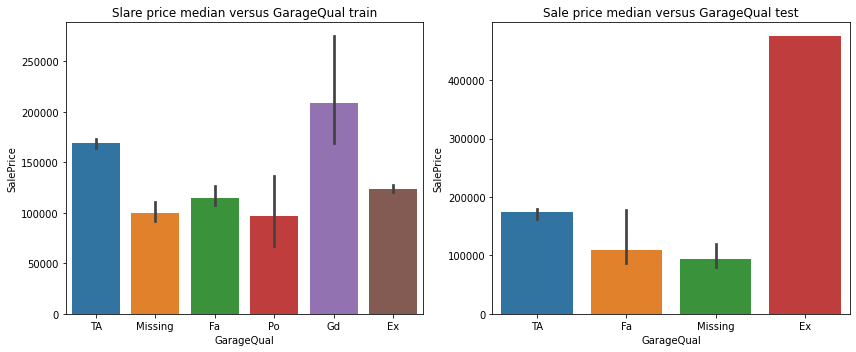

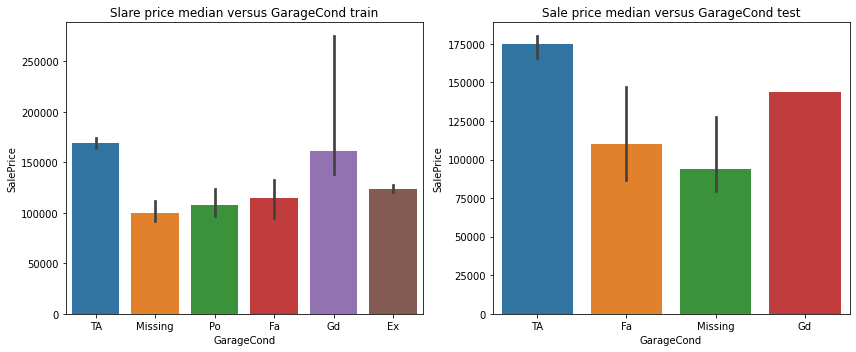

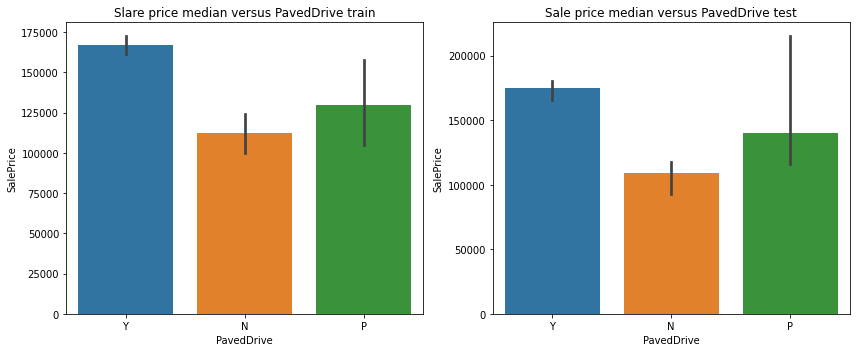

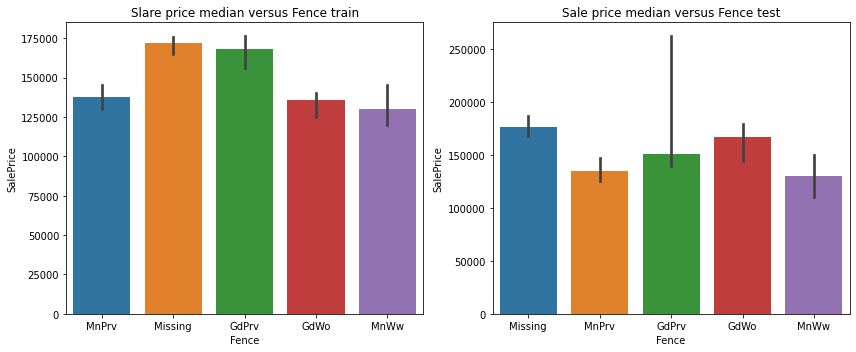

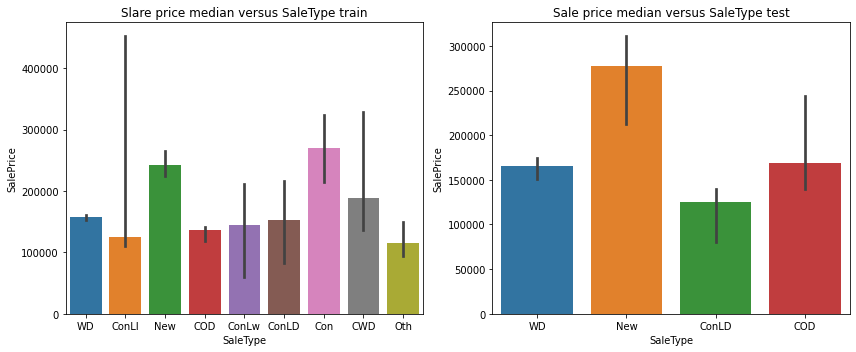

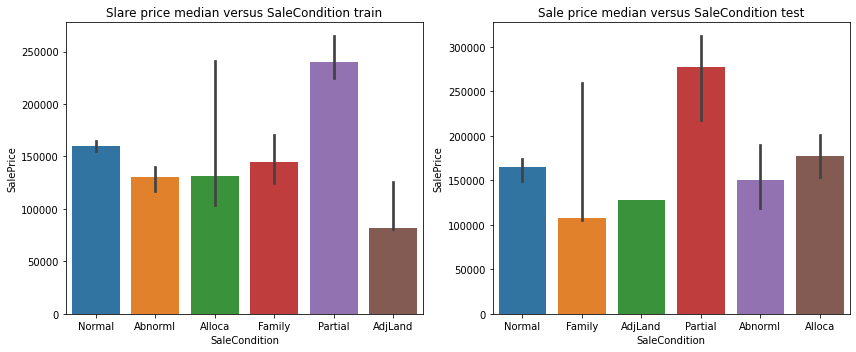

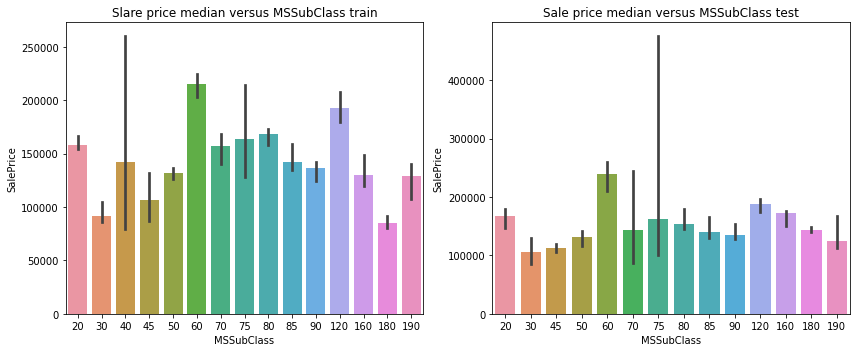

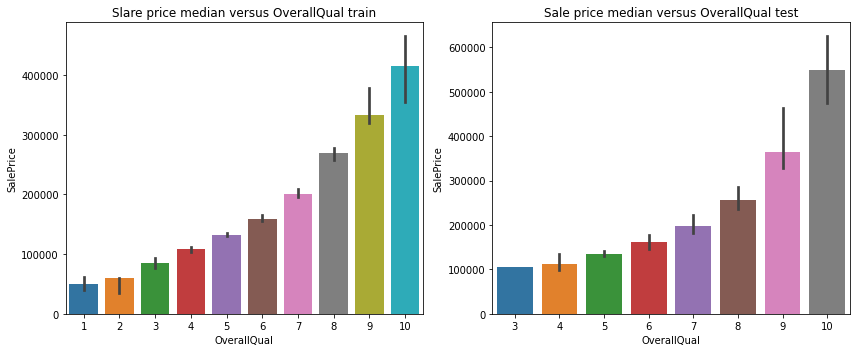

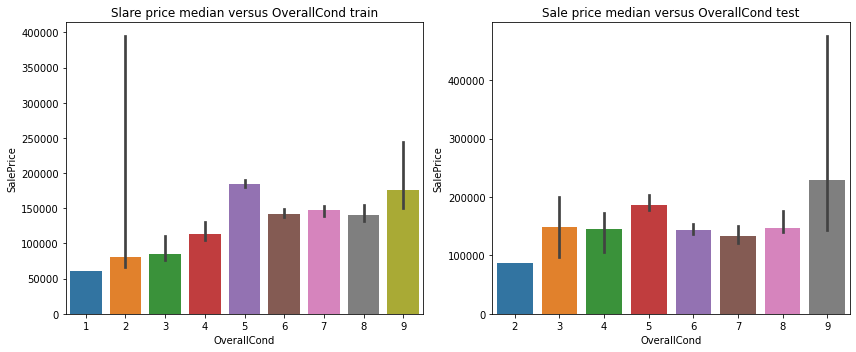

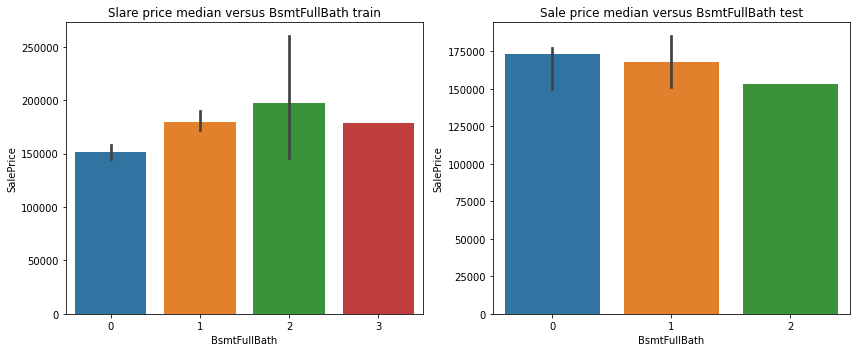

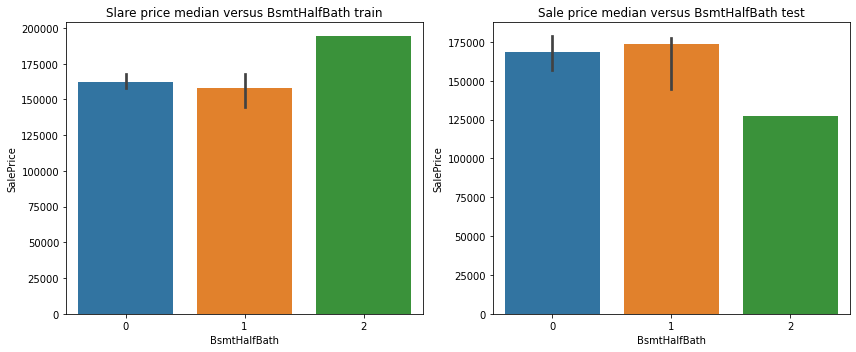

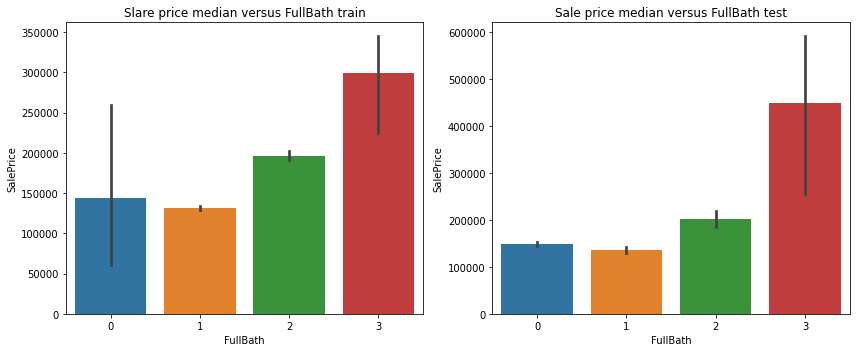

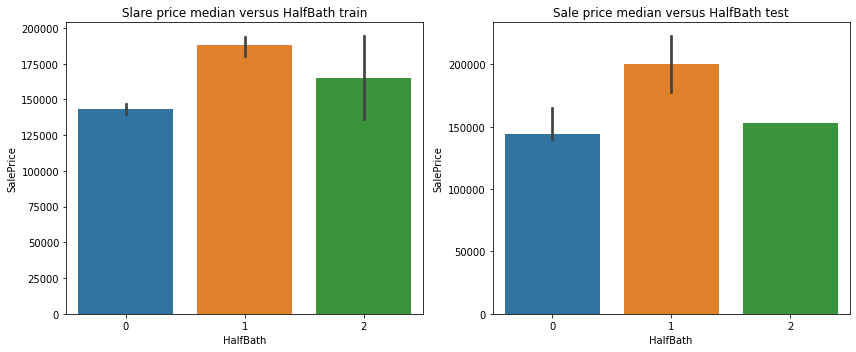

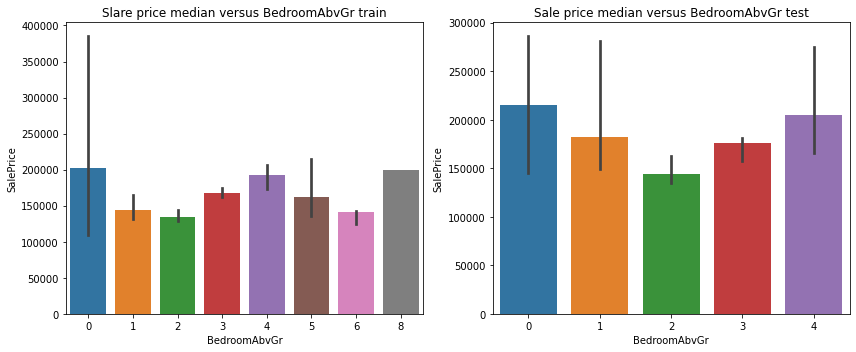

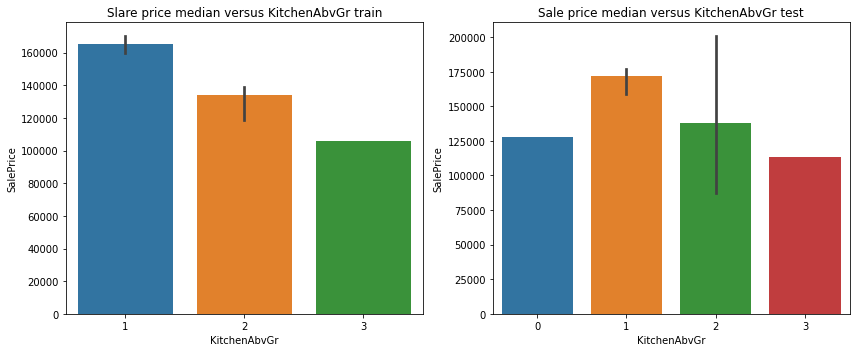

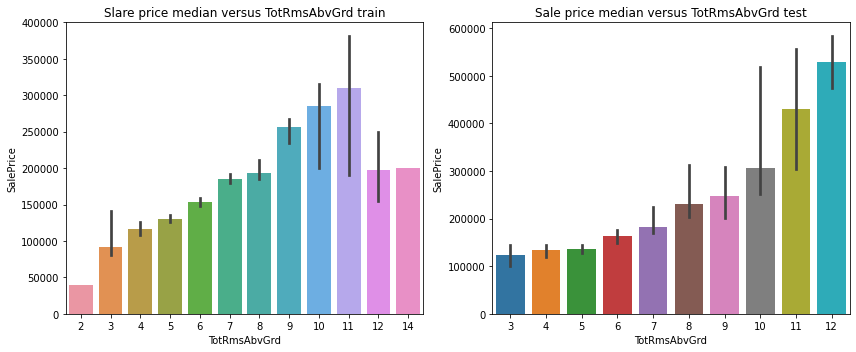

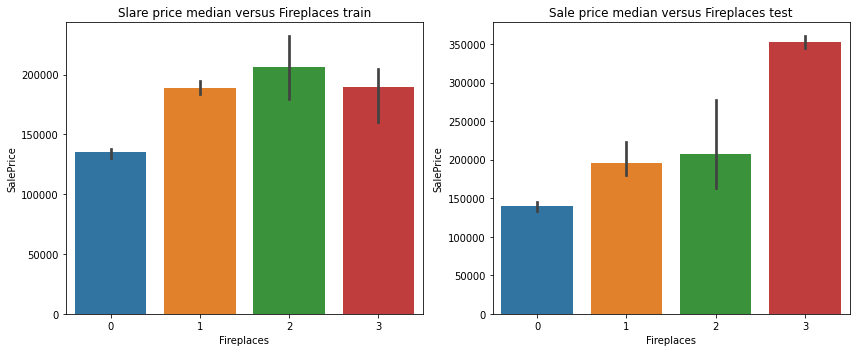

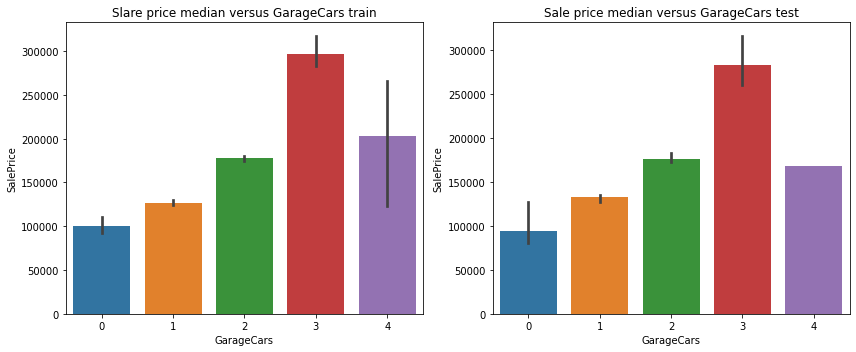

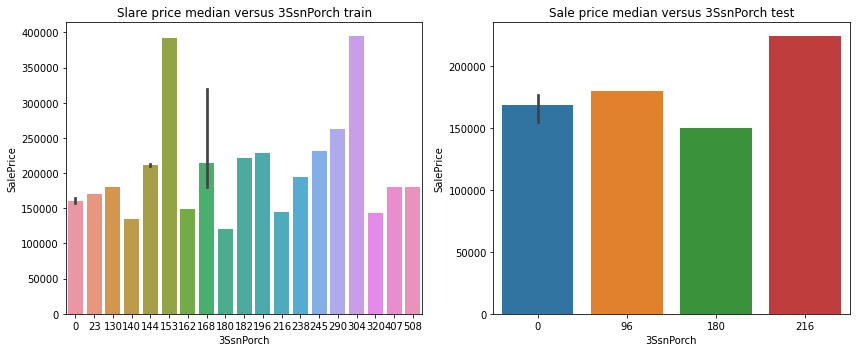

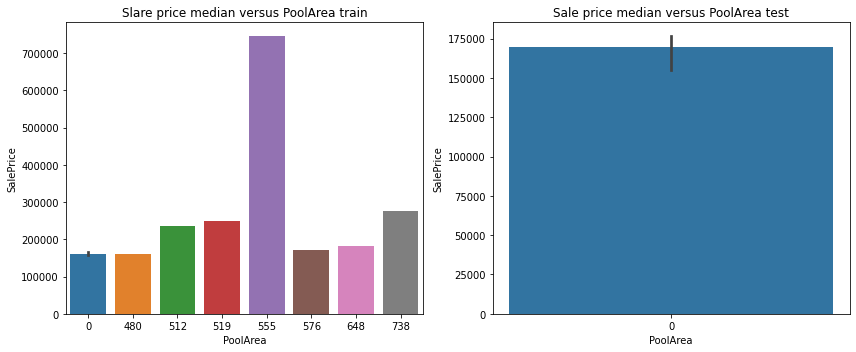

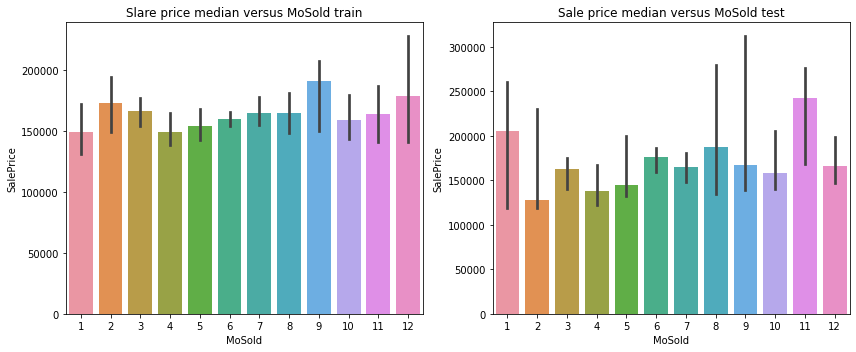

In [ ]:
for col in cat_vars:
  try:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.barplot(x=X_train[col],y=np.exp(y_train),estimator=np.median,ax=ax[0])
    sns.barplot(x=X_test[col],y=np.exp(y_test),estimator=np.median,ax=ax[1])
    ax[0].set_title(f'Slare price median versus {col} train')
    ax[1].set_title(f'Sale price median versus {col} test')
    plt.tight_layout()
    plt.show()
  except Exception as e:
    print(e)

**Feature enginnering**

Engineering of time features

In [ ]:
def engineer_time_features(X_train,X_test,var_year,ref_year):
  for col in var_year:
    if col != ref_year:
      X_train[col]=X_train[ref_year]-X_train[col]   # we need to use the dfiirence in year for the model fiiting
      X_test[col]=X_test[ref_year]-X_test[col]
  X_train.drop(columns=ref_year,inplace=True)
  X_test.drop(columns=ref_year,inplace=True)  
  
  return (X_train,X_test)

X_train,X_test=engineer_time_features(X_train,X_test,year_cols,"YrSold")

print(num_vars)
num_vars.remove('YrSold')
#num_vars = [num_var for num_var in num_vars if num_var != 'YrSold'] #same as up
print(num_vars)
print(X_train['YearBuilt'].head(20))


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
392      48
252       4
155      84
1336     35
1011     45
1029     34
630     126
310      13
935      80
1199     43
894      30
154      83
203       4
1351     46
1249     57
1101     36
84       14
1152     50
1014     59
86        4
Name: YearBuilt, dtype: int64


Engineering rare categories

In [ ]:
'''learning '''
print(cat_vars)
print(X_train['LotShape'].value_counts())
print(X_train['LotShape'].value_counts(normalize=True)) # this is the percentage of categories in each feature(=col)
perc=X_train['LotShape'].value_counts(normalize=True)
print(perc[perc<0.03])
print(perc[perc<0.03].index) # .index return the unique values that exist in the feature
print(perc.index)
rare_cat=perc[perc<0.03].index
print("------------")
print(X_train['LotShape'].isin(rare_cat).head(10)) # return boolean pandas series

print(X_train.loc[X_train['LotShape'].isin(rare_cat),'LotShape'].head(10))



['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
Reg    801
IR1    400
IR2     32
IR3      8
Name: LotShape, dtype: int64
Reg    0.645447
IR1    0.322321
IR2    0.025786
IR3    0.006446
Name: LotShape, dtype: float64
IR2    0.025786
IR3    0.006446
Name: LotShape, dtype: float64
Index(['IR2'

In [ ]:
print(cat_vars)
print(X_train['MSZoning'].value_counts())

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
RL         976
RM         190
FV          51
RH          14
C (all)     10
Name: MSZoning, dtype: int64


In [ ]:
def engi_rare_cat(X_train,X_test,cat_vars,min_perc=0.03): #0.03 is the minimum allowed % for rare feature
                                                           # or they will be replace by "Rare"
  to_drop_2=[] # i used to_drop_2 because to_drop is already used and may cause errors

  for col in cat_vars:
    if X_train[col].dtypes=='object':
            
      percs=X_train[col].value_counts(normalize=True)
      rare_cat=percs[percs<min_perc].index

      #Replace with rare
      X_train.loc[X_train[col].isin(rare_cat),col]='Rare'
      X_test.loc[X_test[col].isin(rare_cat),col]='Rare'

      logging.info(f'Engineered cat for {col}')

    # Remove features with one category only
    if X_train[col].nunique() <2:
       to_drop_2.append(col)
  print(to_drop_2)
  print(cat_vars)       
  if to_drop_2: # i must put an if statemet cause maybe to_drop_2 is empty it will cause error  
       X_train.drop(columns=to_drop_2,inplace=True)
       X_test.drop(columns=to_drop_2,inplace=True)
       #cat_vars.remove(to_drop_2)   # it is not working allways giving error
       cat_vars = list(set(cat_vars).difference(to_drop_2))
  '''
  for col in to_drop_2:
       cat_vars.remove(col)  # this for loop do the same job as the line aboce
  '''
  print(to_drop_2)
  print(cat_vars)
  return X_train,X_test,cat_vars 

In [ ]:
print(len(cat_vars))

55


In [ ]:
X_train,X_test,cat_vars=engi_rare_cat(X_train,X_test,cat_vars)

[]
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
[]
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQua

In [ ]:
print(len(cat_vars))

55


**Preparing the right format for modeling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Select & separate the categorical & numerical columns in the training data
X_train_cat=X_train.loc[:,[col for col in X_train.columns if col in cat_vars]]
print(X_train_cat.head())
print("----------")
X_train_num=X_train[[col for col in X_train.columns if col in num_vars]]
print(X_train_num.head())

#  Select & separate the categorical & numerical columns in the testing data
X_test_cat=X_test.loc[:,[col for col in X_test.columns if col in cat_vars]]
X_test_num=X_test.loc[:,[col for col in X_test.columns if col in num_vars]]

      MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
392           20       RL   Pave      IR1         Lvl    AllPub    Inside   
252           60       RL   Pave      IR1         Lvl    AllPub    Inside   
155           50       RL   Pave      Reg         Lvl    AllPub    Corner   
1336          90       RL   Pave      IR1         Lvl    AllPub    Inside   
1011          90       RL   Pave      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
392        Gtl        NAmes       Norm       Norm     1Fam     1Story   
252        Gtl      SawyerW       Norm       Norm     1Fam     2Story   
155        Gtl      Edwards     Artery       Norm     1Fam     1.5Fin   
1336       Gtl       NWAmes      Feedr       Norm   Duplex     1Story   
1011       Gtl      Edwards       Norm       Norm   Duplex     1Story   

      OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
392             5    

In [ ]:
#Standarizing numerical features 
'''
z = (x - u) / s   this is the z score normaliztion where u is the mean and s is the standar deviation

the importance of the z transform is to maintain the importance of the outliers
'''
scaler=StandardScaler()
X_train_num_1=scaler.fit_transform(X_train_num) # this will return a numpy array
X_test_num_1=scaler.transform(X_test_num)

print(X_train_num_1[0,:])
print("--------------")
print(X_test_num_1[0:2,:])

[-0.37188398 -0.21158325  0.35863306  1.20238265 -0.57869821 -0.95231082
 -0.27963649 -1.28849322 -2.36379908 -0.7141625  -0.80082834 -0.12012952
 -1.19860176  0.79079349 -0.81190071 -0.75110403 -0.6978548  -0.34918111
 -0.25862546  2.14930041]
--------------
[[-0.37188398 -0.08424041 -0.92207834 -0.68489213  0.44269531 -0.95231082
  -0.27963649  0.71077662 -0.38018726 -0.7090777   1.84248996 -0.12012952
   0.97684327 -0.76700757 -0.15270044  0.3917836   0.03122275 -0.34918111
  -0.25862546 -0.09022151]
 [-0.37188398 -0.07386514  2.26328079  1.58951593 -0.57869821 -0.95231082
  -0.27963649  1.1879779   0.09327664 -0.17263124  0.75852277 -0.12012952
   0.48439648  2.30865094  1.47175738 -0.75110403 -0.6978548   1.15145524
  -0.25862546 -0.09022151]]


In [ ]:
# One-hot encoding categorical feature columns
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat_1=ohe.fit_transform(X_train_cat)    # return numpy array
X_test_cat_1=ohe.transform(X_test_cat)  #if i use fit_transform i would have different number of columns
                                        #in the numy array X_test_cat_1 becasue values differ btewemm train
                                        # and testing data sets, 

print(type(X_test_cat_1))
print(X_train_cat.shape)
print(X_train_cat_1.shape)


'''
 we can notice a very high increase in numbre of features,
because after the one hot encoder every unique value of the
categorical features will become a colum by itself 
'''

<class 'numpy.ndarray'>
(1241, 55)
(1241, 283)


'\n we can notice a very high increase in numbre of features,\nbecause after the one hot encoder every unique value of the\ncategorical features will become a colum by itself \n'

Join the training and testing numpy arays before training the model

In [ ]:
X_train_new=np.concatenate((X_train_cat_1,X_train_num_1),axis=1)
X_test_new=np.concatenate((X_test_cat_1,X_test_num_1),axis=1)

print(X_train_cat_1.shape)
print(X_train_num_1.shape)
print(X_train_new.shape)
print("----test---")
print(X_test_cat_1.shape)
print(X_test_num_1.shape)
print(X_test_new.shape)

(1241, 283)
(1241, 20)
(1241, 303)
----test---
(219, 283)
(219, 20)
(219, 303)


**Model training**

In [ ]:
# Train a Linear Regression Model
LR=LinearRegression()
LR.fit(X=X_train_new,y=y_train)

predict_out=LR.predict(X=X_test_new)
print(predict_out)
print(f'the real sale price {np.exp(predict_out)}')

score=mean_squared_error(y_test,predict_out)
print(f'the score is {score}')

[ 1.22725830e+01  1.16652832e+01  1.18164062e+01  1.24611816e+01
  1.18115234e+01  1.23218994e+01  1.26348877e+01 -6.22927668e+09
  1.19262695e+01  1.17655029e+01  1.19954834e+01  1.23106079e+01
  1.18242188e+01  1.16306152e+01  1.24643555e+01  1.22520752e+01
  1.16608887e+01  1.27462158e+01  1.22705688e+01  1.21856079e+01
  1.20040894e+01  1.21033936e+01  1.16805420e+01  1.19458008e+01
  1.22507324e+01  1.19943848e+01  1.23237305e+01  1.21596680e+01
  1.16964722e+01  1.17799683e+01  1.18542480e+01  1.22016602e+01
  1.18770752e+01  1.21157837e+01  1.28343506e+01  1.21650391e+01
  1.20491943e+01  1.28604126e+01  1.21525269e+01  1.16344604e+01
  1.19033813e+01  1.22191772e+01  1.22026367e+01  1.19611816e+01
  1.22113037e+01  1.16964111e+01  1.26304321e+01  1.23192139e+01
  1.23768921e+01  1.16687012e+01  1.23128052e+01  1.21537476e+01
  1.19237061e+01  1.19354248e+01  1.14968262e+01  1.20295410e+01
  1.17775879e+01  1.19337769e+01  1.23672485e+01  1.28891602e+01
  1.15718994e+01  1.29208

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [ ]:
# train and compare multiple regression model
reg_1=LinearRegression()
reg_2=SVR()
reg_3=RandomForestRegressor(random_state=SEED, n_estimators=10)
reg_4=GradientBoostingRegressor(random_state=SEED, n_estimators=10)

models =[]
models.append(('LR',reg_1))
models.append(('SVR',reg_2))
models.append(('RF',reg_3))
models.append(('GB',reg_4))

print(type(models))
print(type(models[0]))

scores=[]
names=[]
for name,model in models:
  model.fit(X=X_train_new,y=y_train)
  predicted_out=model.predict(X=X_test_new)
  score=mean_squared_error(y_test,predicted_out)

  scores.append(score)
  names.append(name)
  output="%s: %f" % (name,score) # this line need research 
  print(output)

plt.barh(names[1:len(names)])

NameError: ignored